## Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Data Exploration

In [2]:
df = pd.read_csv('fraudTrain.csv')

# An overview of all the columns and their values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
# Printing the unique values for each column
cols = df.columns

for col in cols:
    print(f"{col} : {len(df[col].unique())}")

Unnamed: 0 : 1296675
trans_date_trans_time : 1274791
cc_num : 983
merchant : 693
category : 14
amt : 52928
first : 352
last : 481
gender : 2
street : 983
city : 894
state : 51
zip : 970
lat : 968
long : 969
city_pop : 879
job : 494
dob : 968
trans_num : 1296675
unix_time : 1274823
merch_lat : 1247805
merch_long : 1275745
is_fraud : 2


In [5]:
# Dropping the columns that are not needed
df.drop(['Unnamed: 0', 'unix_time'], axis = 1, inplace = True)
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...    zip      lat  \
0                561 Perry Cove  Moravian Falls  ...  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient  ...  99160  48.8878   
2      594 White Dale Suite 530      Malad City  ...  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder  ...  59632  46.2306   
4              408 Bradley Rest        Doe Hill  ...  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num  merch_lat  merch_long  is_fraud  
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0  
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0  
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0  
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0  
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0  

[5 rows x 21 columns]

In [6]:
# Checking the imbalance in the target variable
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

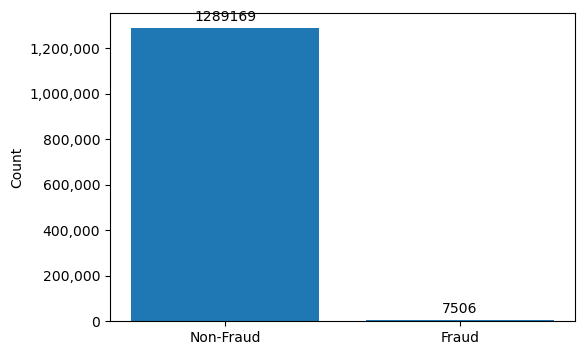

In [7]:
# Counts non-fraud (0) and fraud (1)
fraud_counts = df.is_fraud.value_counts()
non_fraud_count = fraud_counts.get(0, 0)
fraud_count = fraud_counts.get(1, 0)

# Create labels and values for the bar chart
labels = ['Non-Fraud', 'Fraud']
counts = [non_fraud_count, fraud_count]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, counts)
plt.ylabel('Count')
#plt.title('Fraud vs Non-Fraud in Train Dataset')

# Set a custom formatter for the y-axis to show raw numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Add count labels on top of each bar
plt.bar_label(bars, padding=3, fmt='{:.0f}')
#plt.savefig("imbalanceClasses.png", dpi=400, bbox_inches="tight")
plt.show()

In [8]:
# Summary statistics of the dataset
df.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  6.751027e+01 -6.695090e+01  1.000000e+00

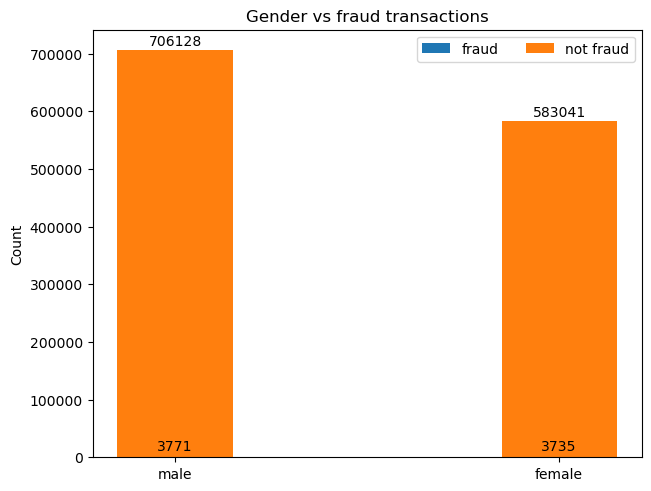

In [9]:
# Gender-based fraud relationships
gender = ["male", 'female']
fraud_count = {
    'fraud': {3771, 3735},
    'not fraud' : {706128, 583041}
}

x = np.arange(len(gender))
width = 0.3
mult = 0

fig, ax = plt.subplots(layout = 'constrained')
for attr, val in fraud_count.items():
    offset = mult * width
    rects = ax.bar(x + width, val, width, label = attr)
    ax.bar_label(rects, padding = 1.5)
    mult += 1
    
    
ax.set_ylabel("Count")
ax.set_xticks(width + x, gender)
ax.set_title("Gender vs fraud transactions")
ax.legend(ncols = 2)
plt.show()

In [10]:
# Date time conversion and analysis
def date_time_analysis(df):
#     newdf = df.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    
    df['transact_hour'] = df['trans_date_trans_time'].dt.hour
    df['transact_mth'] = df['trans_date_trans_time'].dt.month
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


date_time_analysis(df)
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... city_pop  \
0                561 Perry Cove  Moravian Falls  ...     3495   
1  43039 Riley Greens Suite 393          Orient  ...      149   
2      594 White Dale Suite 530      Malad City  ...     4154   
3   9443 Cynthia Court Apt. 038         Boulder  ...     1939   
4              408 Bradley Rest        Doe Hill  ...       99   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num  merch_lat  merch_long is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315        0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462        0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481        0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071        0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459        0   

  transact_hour  transact_mth  age  
0             0             1   31  
1             0             1   41  
2             0             1   57  
3             0             1   52  
4             0             1   33  

[5 rows x 24 columns]

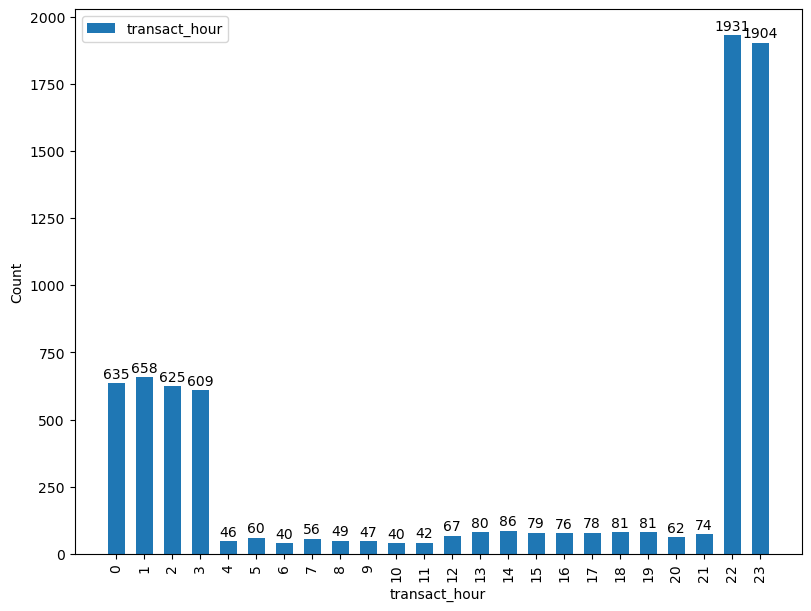

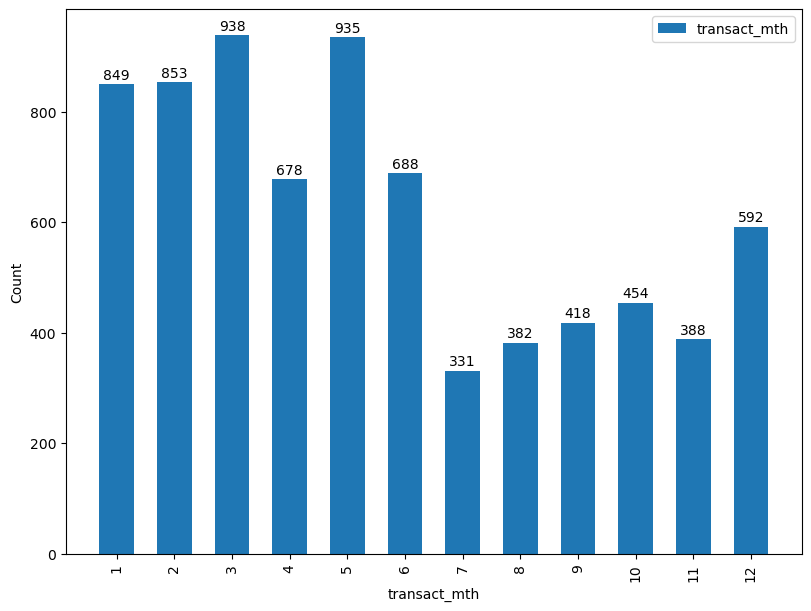

In [11]:
# Time of the day vs fraud transactions
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_ratio = fraud_df.groupby(column).size()
    
    categories = fraud_ratio.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_ratio, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    #ax.set_title("Ratio of fraudulent transactions to non fraudulent transactions")
    ax.legend(ncols=2)
    #plt.savefig("locationMerchantAnalysis.png", dpi=400, bbox_inches="tight")  
    plt.show()

columns = ['transact_hour', 'transact_mth']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

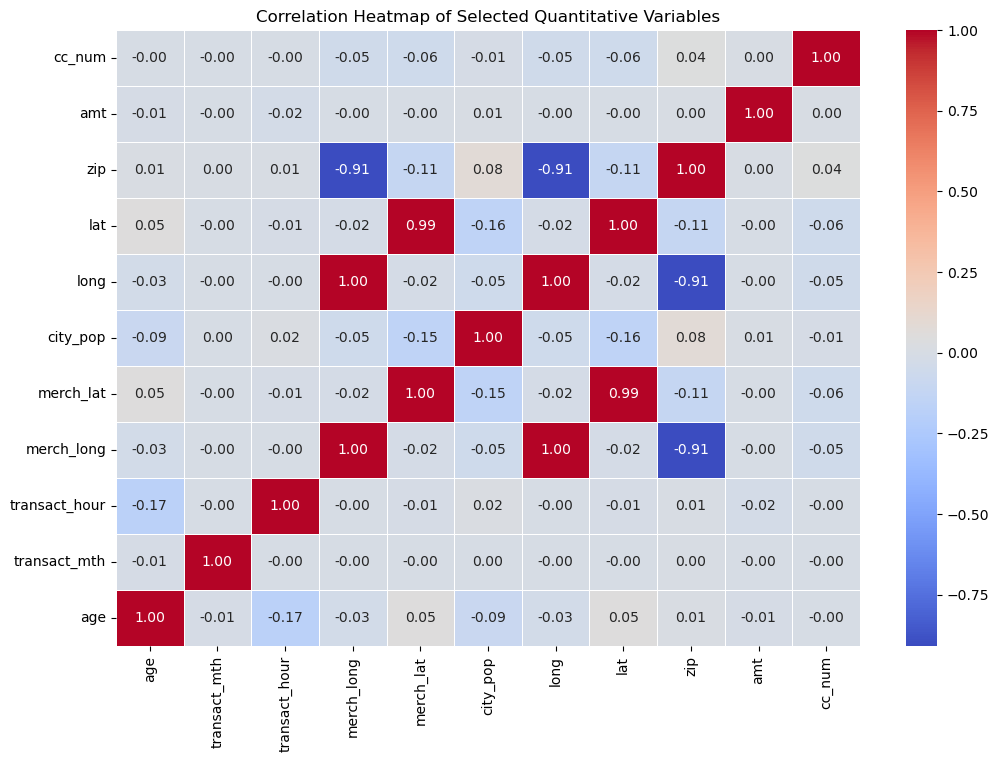

In [12]:
# Selecting the quantitative variables for correlation analysis
quant_vars = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
              'merch_lat', 'merch_long', 'transact_hour', 'transact_mth', 'age']

# Creating a correlation matrix
corr_matrix = df[quant_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.gca().invert_xaxis()  # Invert x-axis
plt.title('Correlation Heatmap of Selected Quantitative Variables')
plt.show()

In [13]:
# Geographic location analysis

region_boundaries = {
    'NewEngland': {'lat_range': (40, 47), 'long_range': (-74, -66)},
    'NY_NJ_PuertoRico_VirginIslands': {'lat_range': (17, 45), 'long_range': (-80, -65)},
    'MidAtlantic': {'lat_range': (36, 42), 'long_range': (-83, -74)},
    'Southeast': {'lat_range': (24, 39), 'long_range': (-91, -75)}, 
    'Midwest': {'lat_range': (36, 49), 'long_range': (-93, -80)},  
    'SouthCentral': {'lat_range': (25, 37), 'long_range': (-106, -89)}, 
    'Plains': {'lat_range': (36, 43), 'long_range': (-102, -89)},
    'Mountain': {'lat_range': (37, 49), 'long_range': (-114, -102)}, 
    'WestCoast_PacificIslands': {'lat_range': (13, 42), 'long_range': (-160, -105)},
    'Northwest_Alaska': {'lat_range': (42, 72), 'long_range': (-150, -110)}
}

def get_region_by_lat_long(lat, long):
    for region, bounds in region_boundaries.items():
        lat_min, lat_max = bounds['lat_range']
        long_min, long_max = bounds['long_range']
        if lat_min <= lat <= lat_max and long_min <= long <= long_max:
            return region
    return "Outside US"


In [14]:
# Adding the customer and merchant location columns
df['cust_loc'] = df.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)
df['merch_loc'] = df.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

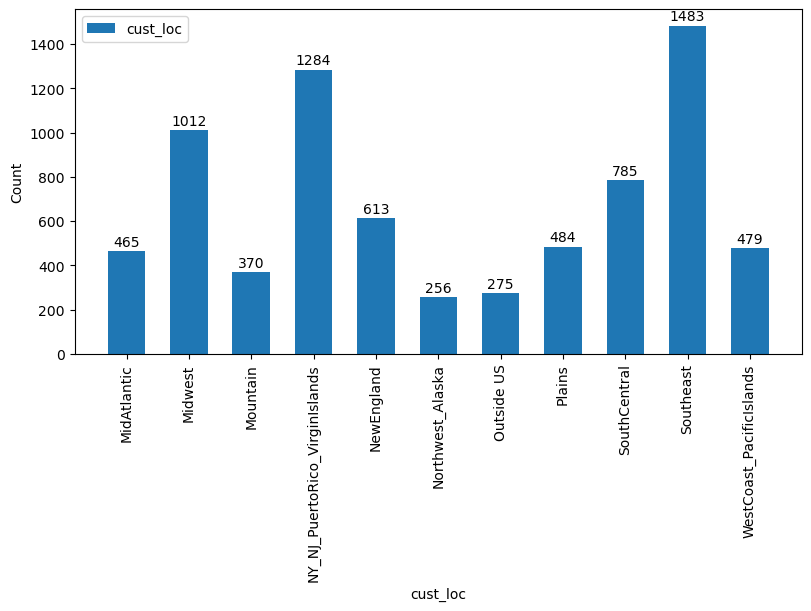

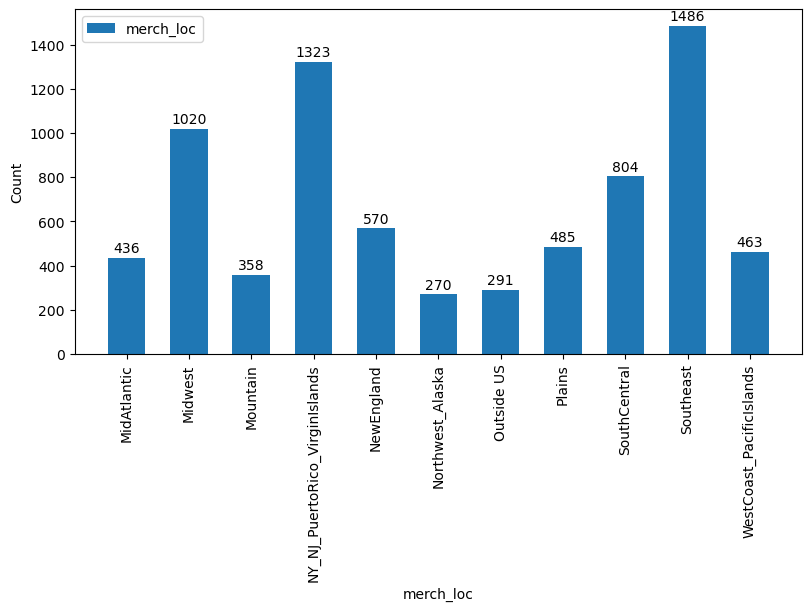

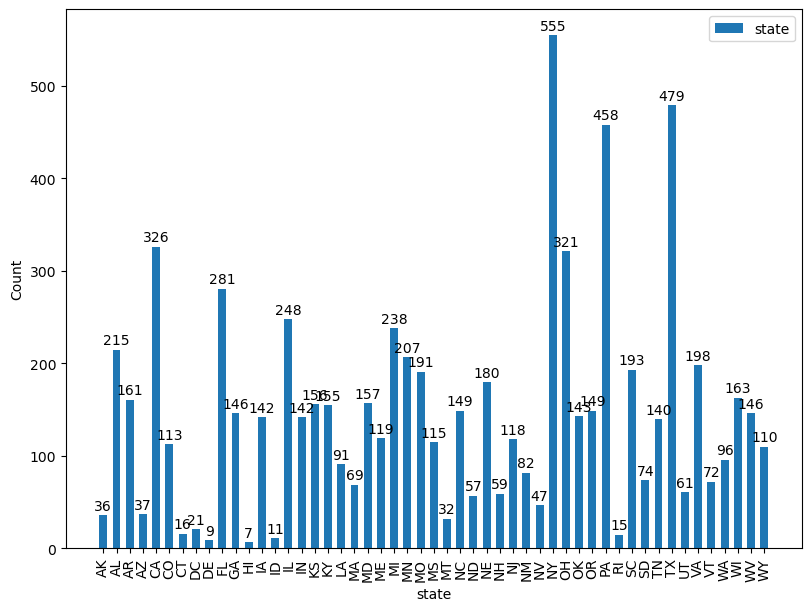

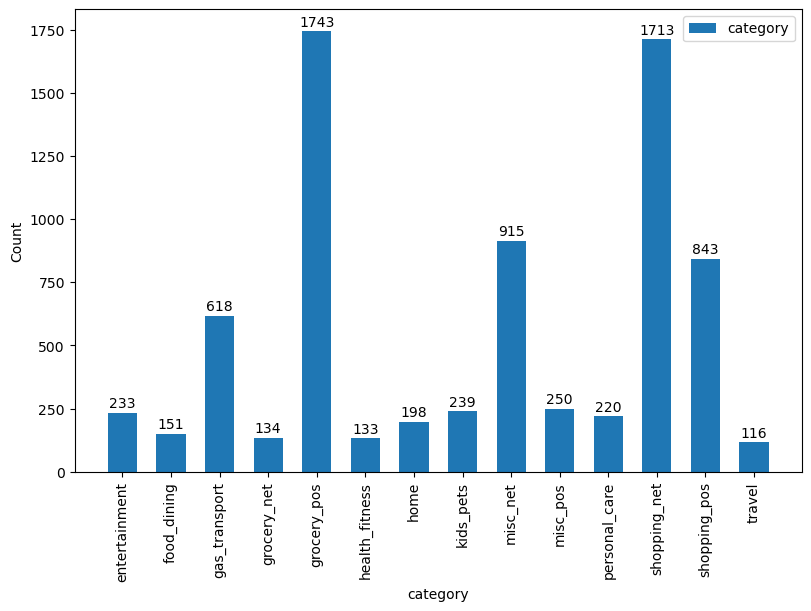

In [15]:
# State and Region analysis
columns = ['cust_loc', 'merch_loc', 'state','category']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

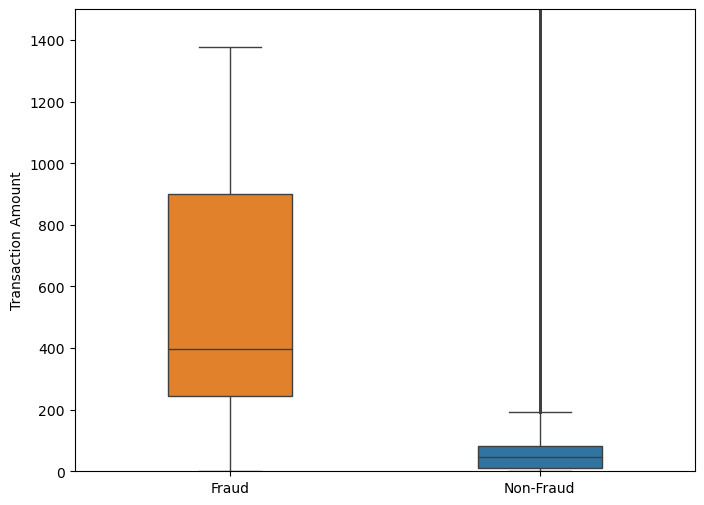

In [16]:
# box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='is_fraud', y='amt', data=df, hue='is_fraud', order=[1, 0], flierprops={'markersize': 1}, width=0.4, legend=False)
#plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
#plt.title('Box Plot of Transaction Amounts: Fraud vs Non-Fraud')
plt.xticks(ticks=[0, 1], labels=['Fraud', 'Non-Fraud'])
plt.ylim(0, 1500) 
plt.xlabel('') 
plt.savefig("comparingFraudNonFraudAmount.png", dpi=400, bbox_inches="tight")  
plt.show()

amount_bin_str
0-100        1652
100-200       150
200-300       796
300-400      1159
400-500       101
500-600        94
600-700       167
700-800       663
800-900       831
900-1000      944
1000-1100     646
1100-1200     246
1200+          57
Name: is_fraud, dtype: int64


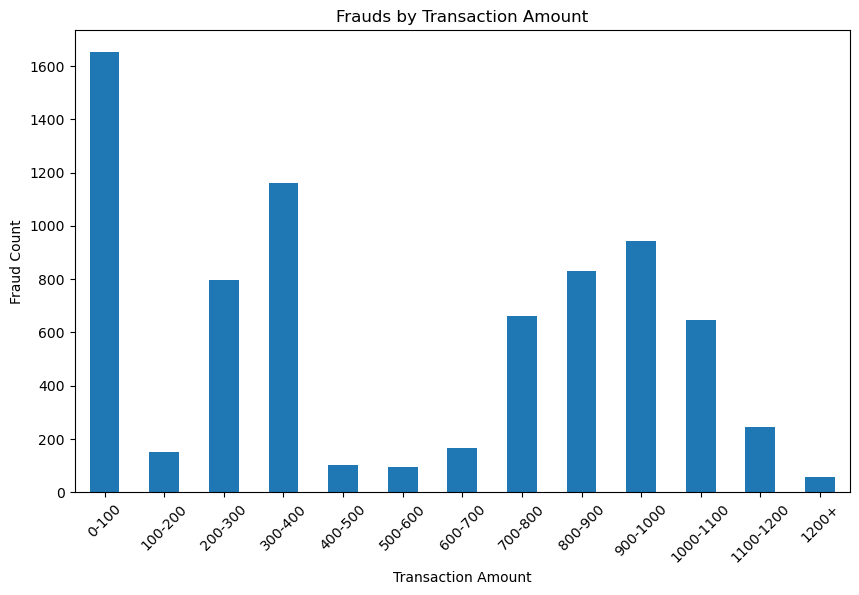

In [17]:
# Create a separate copy of the original dataset
df_amt = df.copy()

# Define bins for the amount using the copied dataset
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, df_amt['amt'].max()]
lab = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', 
       '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200+']

# Create a new column for amount bins on the copied dataset
df_amt['amount_bin'] = pd.cut(df_amt['amt'], bins=bins, labels=lab, include_lowest=True)

# Filter the copied DataFrame to include only fraud transactions
fraud_amt = df_amt[df_amt['is_fraud'] == 1].copy()

# Convert the categorical 'amount_bin' to string to avoid grouping warnings
fraud_amt['amount_bin_str'] = fraud_amt['amount_bin'].astype(str)

# Group by the string version of the amount bin and count frauds
amt_anal = fraud_amt.groupby('amount_bin_str')['is_fraud'].count()

# Reindex to ensure all bins are present (fill with 0 where no frauds are found)
amt_anal = amt_anal.reindex(lab, fill_value=0)
print(amt_anal)

# Plot the results using the grouped result
amt_anal.plot(kind='bar', figsize=(10, 6))
plt.title("Frauds by Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


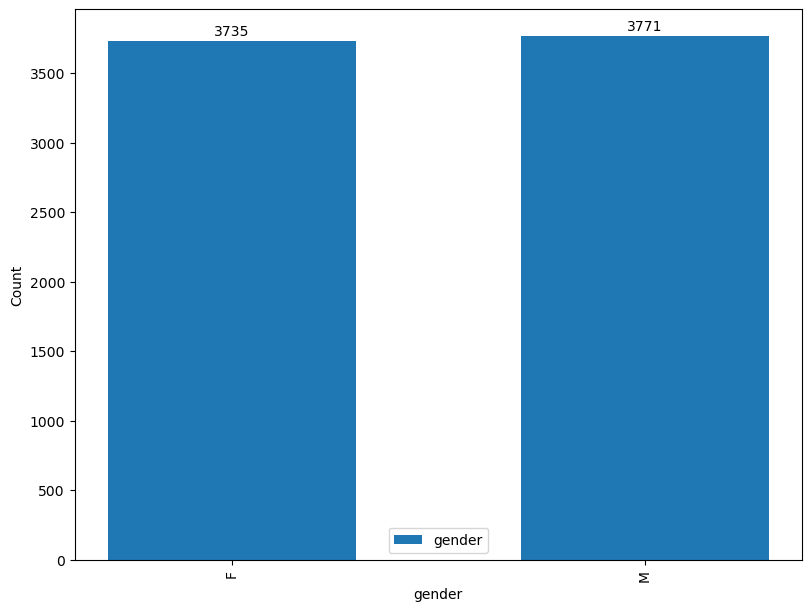

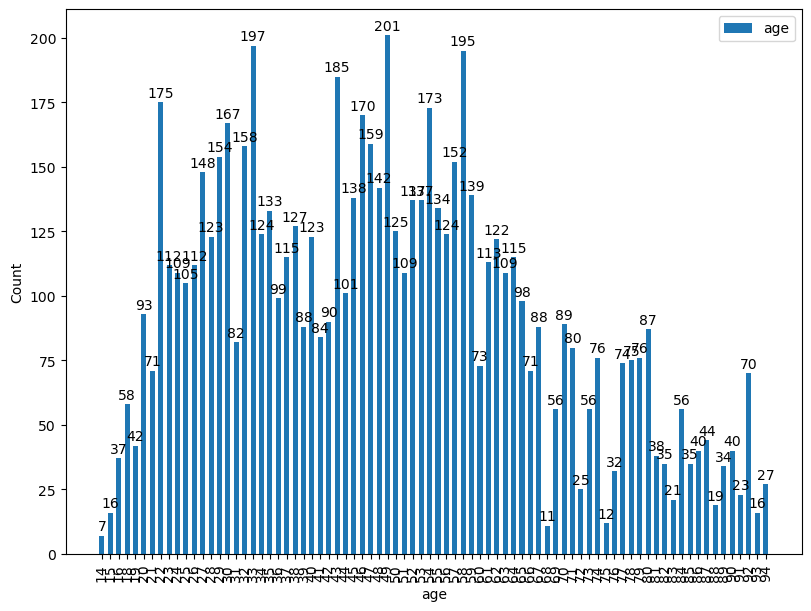

In [18]:
# Age and Gender analysis
columns = ['gender', 'age']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

## Data Preprocessing

In [19]:
cols = df.columns
print(cols)
df.head()

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'transact_hour', 'transact_mth', 'age',
       'cust_loc', 'merch_loc'],
      dtype='object')


trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...        dob  \
0                561 Perry Cove  Moravian Falls  ... 1988-03-09   
1  43039 Riley Greens Suite 393          Orient  ... 1978-06-21   
2      594 White Dale Suite 530      Malad City  ... 1962-01-19   
3   9443 Cynthia Court Apt. 038         Boulder  ... 1967-01-12   
4              408 Bradley Rest        Doe Hill  ... 1986-03-28   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  transact_hour transact_mth age                        cust_loc  \
0             0            1  31                     MidAtlantic   
1             0            1  41                Northwest_Alaska   
2             0            1  57                        Mountain   
3             0            1  52                        Mountain   
4             0            1  33  NY_NJ_PuertoRico_VirginIslands   

                        merch_loc  
0                     MidAtlantic  
1                Northwest_Alaska  
2                        Mountain  
3                        Mountain  
4  NY_NJ_PuertoRico_VirginIslands  

[5 rows x 26 columns]

### Remove Redundant/Unnecessary Columns
In our data we have geographical data in form of both coordinates and city/state location. So we can choose either of them to work with. However as the latitude and longitude data gives us more information, we will keep it and remove street, city and state data as it is redundant. Additionally we drop columns that are redundant or from which we have already extracted relevant data or one which simply has too many unique values for us to resonably handle.

In [20]:
df.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num',
        'merch_lat', 'merch_long'], axis = 1, inplace = True)
new_dataset = df.copy()

In [21]:
cols = df.columns
for col in cols:
    print(f"{col} : {len(df[col].unique())}")

cc_num : 983
merchant : 693
category : 14
amt : 52928
gender : 2
city_pop : 879
job : 494
is_fraud : 2
transact_hour : 24
transact_mth : 12
age : 83
cust_loc : 11
merch_loc : 11


In [22]:
# Encoders for the categorical columns and normalizing the numerical columns
def percentage_encode(df, col):
    normalized_count = df[col].value_counts(normalize = True) * 100
    df[col] = df[col].map(normalized_count)
    
def label_encoder(df, columns):
    for cols in columns:
        unique_values = df[cols].unique()
        name_to_num = {name: i for i, name in enumerate(unique_values)}
        df[cols] = df[cols].map(name_to_num).astype(int)
        
def onehotencode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column).astype(int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)        
    return df

In [23]:
df.head()

cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt gender  city_pop                                job  is_fraud  \
0    4.97      F      3495          Psychologist, counselling         0   
1  107.23      F       149  Special educational needs teacher         0   
2  220.11      M      4154        Nature conservation officer         0   
3   45.00      M      1939                    Patent attorney         0   
4   41.96      M        99     Dance movement psychotherapist         0   

   transact_hour  transact_mth  age                        cust_loc  \
0              0             1   31                     MidAtlantic   
1              0             1   41                Northwest_Alaska   
2              0             1   57                        Mountain   
3              0             1   52                        Mountain   
4              0             1   33  NY_NJ_PuertoRico_VirginIslands   

                        merch_loc  
0                     MidAtlantic  
1                Northwest_Alaska  
2                        Mountain  
3                        Mountain  
4  NY_NJ_PuertoRico_VirginIslands

In [24]:
# Percentage Encoder to Normalize the numerical columns
cols = ['cc_num', 'merchant', 'city_pop', 'job']
for col in cols:
    percentage_encode(new_dataset, col)

# Label Encoding the Binary categorical column
col = ['gender']
label_encoder(new_dataset, col)

# One hot encoding the categorical columns
columns = ['category', 'cust_loc', 'merch_loc']
new_dataset = pd.get_dummies(new_dataset, columns=columns, drop_first=True)

In [25]:
new_dataset.head()

cc_num  merchant     amt  gender  city_pop       job  is_fraud  \
0  0.156400  0.097711    4.97       0  0.156400  0.273392         0   
1  0.233675  0.193032  107.23       0  0.234446  0.393237         0   
2  0.038792  0.146143  220.11       1  0.038792  0.039408         0   
3  0.038020  0.201515   45.00       1  0.038020  0.195114         0   
4  0.155552  0.122776   41.96       1  0.194189  0.155552         0   

   transact_hour  transact_mth  age  ...  merch_loc_Midwest  \
0              0             1   31  ...              False   
1              0             1   41  ...              False   
2              0             1   57  ...              False   
3              0             1   52  ...              False   
4              0             1   33  ...              False   

   merch_loc_Mountain  merch_loc_NY_NJ_PuertoRico_VirginIslands  \
0               False                                     False   
1               False                                     False   
2                True                                     False   
3                True                                     False   
4               False                                      True   

   merch_loc_NewEngland  merch_loc_Northwest_Alaska  merch_loc_Outside US  \
0                 False                       False                 False   
1                 False                        True                 False   
2                 False                       False                 False   
3                 False                       False                 False   
4                 False                       False                 False   

   merch_loc_Plains  merch_loc_SouthCentral  merch_loc_Southeast  \
0             False                   False                False   
1             False                   False                False   
2             False                   False                False   
3             False                   False                False   
4             False                   False                False   

   merch_loc_WestCoast_PacificIslands  
0                               False  
1                               False  
2                               False  
3                               False  
4                               False  

[5 rows x 43 columns]

In [26]:
new_dataset.columns

Index(['cc_num', 'merchant', 'amt', 'gender', 'city_pop', 'job', 'is_fraud',
       'transact_hour', 'transact_mth', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'cust_loc_Midwest',
       'cust_loc_Mountain', 'cust_loc_NY_NJ_PuertoRico_VirginIslands',
       'cust_loc_NewEngland', 'cust_loc_Northwest_Alaska',
       'cust_loc_Outside US', 'cust_loc_Plains', 'cust_loc_SouthCentral',
       'cust_loc_Southeast', 'cust_loc_WestCoast_PacificIslands',
       'merch_loc_Midwest', 'merch_loc_Mountain',
       'merch_loc_NY_NJ_PuertoRico_VirginIslands', 'merch_loc_NewEngland',
       'merch_loc_Northwest_Alaska', 'merch_loc_Outside US',
       'merch_loc_Plains', 'merch_loc_SouthCentral', 'merch_loc_

In [27]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 43 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   cc_num                                    1296675 non-null  float64
 1   merchant                                  1296675 non-null  float64
 2   amt                                       1296675 non-null  float64
 3   gender                                    1296675 non-null  int32  
 4   city_pop                                  1296675 non-null  float64
 5   job                                       1296675 non-null  float64
 6   is_fraud                                  1296675 non-null  int64  
 7   transact_hour                             1296675 non-null  int32  
 8   transact_mth                              1296675 non-null  int32  
 9   age                                       1296675 non-null  int32  
 10  catego

## Dataset Preparation

### Load and Process the Test Dataset

In [28]:
test = pd.read_csv('fraudTest.csv')

test.drop(['Unnamed: 0', 'unix_time'], axis = 1, inplace = True)

date_time_analysis(test)

# Adding the customer and merchant location columns
test['cust_loc'] = test.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)
test['merch_loc'] = test.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

# Drop Unnecessary columns
test.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num',
        'merch_lat', 'merch_long'], axis = 1, inplace = True)

# Normalizing the numerical columns
cols = ['cc_num', 'merchant', 'city_pop', 'job']
for col in cols:
    percentage_encode(test, col)

# Label Encoding the Binary categorical column
col = ['gender']
label_encoder(test, col)

# One hot encoding the categorical columns
columns = ['category', 'cust_loc', 'merch_loc']
test = pd.get_dummies(test, columns=columns, drop_first=True)

test.head()


cc_num  merchant    amt  gender  city_pop       job  is_fraud  \
0  0.115166  0.132441   2.86       0  0.115166  0.437271         0   
1  0.150616  0.141258  29.84       1  0.306990  0.456166         0   
2  0.193083  0.135860  41.28       1  0.193083  0.465523         0   
3  0.119305  0.127942  60.05       0  0.119305  0.119305         0   
4  0.160333  0.066580   3.19       0  0.320846  0.160333         0   

   transact_hour  transact_mth  age  ...  merch_loc_Midwest  \
0             12             6   52  ...              False   
1             12             6   30  ...              False   
2             12             6   50  ...              False   
3             12             6   33  ...              False   
4             12             6   65  ...               True   

   merch_loc_Mountain  merch_loc_NY_NJ_PuertoRico_VirginIslands  \
0               False                                     False   
1                True                                     False   
2               False                                      True   
3               False                                     False   
4               False                                     False   

   merch_loc_NewEngland  merch_loc_Northwest_Alaska  merch_loc_Outside US  \
0                 False                       False                 False   
1                 False                       False                 False   
2                 False                       False                 False   
3                 False                       False                 False   
4                 False                       False                 False   

   merch_loc_Plains  merch_loc_SouthCentral  merch_loc_Southeast  \
0             False                   False                 True   
1             False                   False                False   
2             False                   False                False   
3             False                   False                 True   
4             False                   False                False   

   merch_loc_WestCoast_PacificIslands  
0                               False  
1                               False  
2                               False  
3                               False  
4                               False  

[5 rows x 43 columns]

## Show distribution on train data

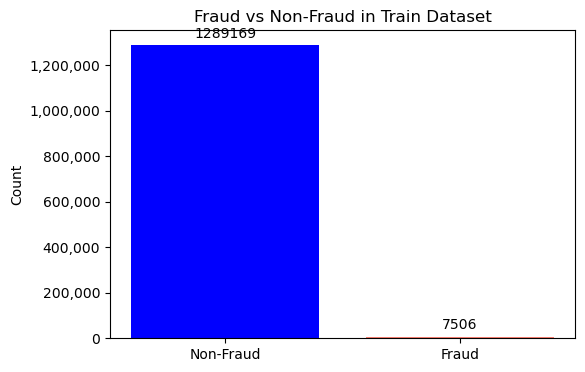

In [29]:
# Counts non-fraud (0) and fraud (1)
fraud_counts = df.is_fraud.value_counts()
non_fraud_count = fraud_counts.get(0, 0)
fraud_count = fraud_counts.get(1, 0)

# Create labels and values for the bar chart
labels = ['Non-Fraud', 'Fraud']
counts = [non_fraud_count, fraud_count]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, counts, color=['blue', 'salmon'])
plt.ylabel('Count')
plt.title('Fraud vs Non-Fraud in Train Dataset')

# Set a custom formatter for the y-axis to show raw numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Add count labels on top of each bar
plt.bar_label(bars, padding=3, fmt='{:.0f}')

plt.show()

# Train and Test Data

In [30]:
# Load the pre-processed dataset
dataset = new_dataset.copy()
# Features and target
X_train = dataset.drop(columns=['is_fraud'])
y_train = dataset['is_fraud']

X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

## Show distribution of frauds in the train dataset

#### Reasons
- before we split the training set into train and validation set, we need to check if the instances of frauds are uniformly distributed.
- If frauds do not follow a uniform distribution, but are densed only in specific part of the dataset, we could not test properly the model
- Luckily, instances of frauds and non-frauds are distributed uniformilly across the training set

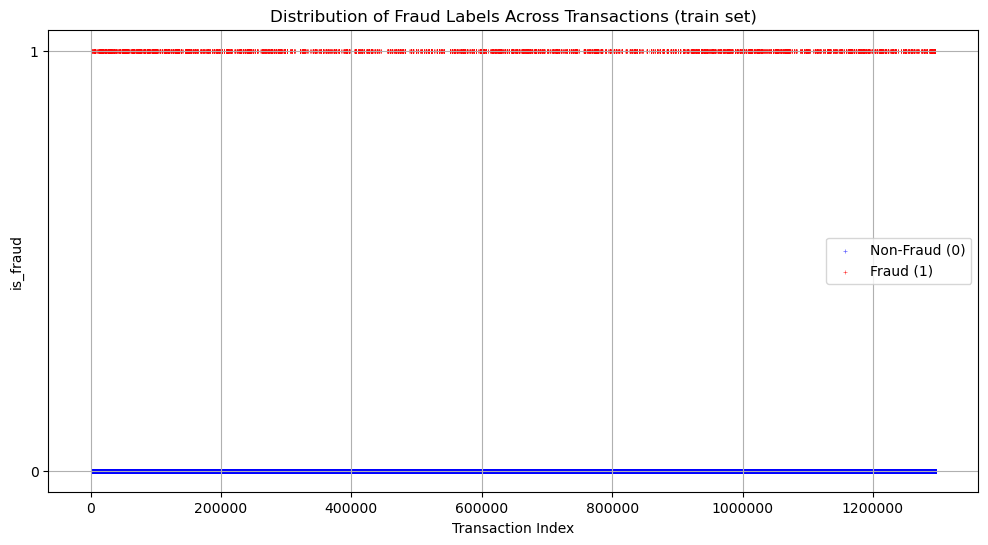

In [31]:
# Get the indices for fraud and non-fraud transactions
fraud_indices = y_train[y_train == 1].index
nonfraud_indices = y_train[y_train == 0].index

plt.figure(figsize=(12, 6))
# Plot non-fraud transactions (blue dots at y=0)
plt.scatter(nonfraud_indices, y_train.loc[nonfraud_indices], 
            color='blue', alpha=0.6, s=10, label='Non-Fraud (0)', marker='+', linewidths=0.5)
# Plot fraud transactions (red dots at y=1)
plt.scatter(fraud_indices, y_train.loc[fraud_indices], 
            color='red', alpha=0.8, s=10, label='Fraud (1)', marker='+', linewidths=0.4)

plt.xlabel("Transaction Index")
plt.ylabel("is_fraud")
plt.title("Distribution of Fraud Labels Across Transactions (train set)")
plt.legend(loc="center right")

# Display full x-axis numbers (disable scientific notation)
plt.ticklabel_format(style='plain', axis='x')

# Set y-axis ticks to only show 0 and 1
plt.yticks([0, 1])

plt.grid(True)
plt.show()


## Split the training set into train set and validation set according to 70/30 rule

#### Reasons
- we are looking for the right hyperparameter K that applies to SMOTE
- this can range between just above the min value of frauds in the train dataset (7,506) and just below twice the minimum
- we want to train the model with more fraud cases
- at the same time, we don't want to classify too many instances as frauds (False positive)
- This is because we want a low recall but also we want to achieve the management target: 1 false negative every 500 false positive
- Hence 8,000 <= k <= 15,000 with step of 500
- This means we need 15 small sets in the validation set, for k={8,000},{8,500},{9,000},...,{15,000}
- we judge the performance by recall and the management target (FN/FP)
- once we found the best k, we apply that K to SMOTE for the final run, that considers the whole training set not splitted.
- Noted: we can split the training set randomly because of the uniform distribution

In [32]:
# Split the training dataset (X_train and y_train) into 70% train and 30% validation sets.
# It is a random split. By default, train_test_split shuffles the data before splitting. 
# random_state=42 ensures that the random split is reproducible.
# We get the same split each time we run this code.
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42)

train_dataset = pd.concat([X_train_split, y_train_split], axis=1)
validation_set = pd.concat([X_val, y_val], axis=1)

# Check the number of instances in the original training dataset and the splits
print("Original training dataset instances:", X_train.shape[0])
print("Train dataset instances (70%):", train_dataset.shape[0])
print("Validation dataset instances (30%):", validation_set.shape[0])
print("Sum of train and validation instances:", train_dataset.shape[0] + validation_set.shape[0])

Original training dataset instances: 1296675
Train dataset instances (70%): 907672
Validation dataset instances (30%): 389003
Sum of train and validation instances: 1296675


## Creating 15 validating set to test the right parameter K for SMOTE

#### Reasons
- we need to find the best hyperparameter K to use in SMOTE for the final run (the whole training dataset) before testing the model on test dataset
- we judge K in terms of recall and management target (False Negative/False Positive), which should get as close as possible to 1:500
- 15 different validation sets are taken from the validation set, because we don't want to validate on repeated data
- We test in this way:
- validation_set1 for k=8,000
- validation_set2 for k=8,500
- ...
- validation_set15 for k=15,000

In [33]:
# Split indices of validation_set into 15 parts
split_indices = np.array_split(validation_set.index, 15)

# Create validation subsets 
validation_splits = [validation_set.loc[idx] for idx in split_indices]

for i, subset in enumerate(validation_splits, start=1):
    globals()[f"validation_set{i}"] = subset

# Verify the number of instances in each subset and in total:
total_instances = 0
for i in range(1, 16):
    num_instances = globals()[f"validation_set{i}"].shape[0]
    print(f"validation_set{i} has {num_instances} instances")
    total_instances += num_instances

print("Total instances in all validation subsets:", total_instances)
print("Total instances in validation_set:", validation_set.shape[0])

validation_set1 has 25934 instances
validation_set2 has 25934 instances
validation_set3 has 25934 instances
validation_set4 has 25934 instances
validation_set5 has 25934 instances
validation_set6 has 25934 instances
validation_set7 has 25934 instances
validation_set8 has 25934 instances
validation_set9 has 25933 instances
validation_set10 has 25933 instances
validation_set11 has 25933 instances
validation_set12 has 25933 instances
validation_set13 has 25933 instances
validation_set14 has 25933 instances
validation_set15 has 25933 instances
Total instances in all validation subsets: 389003
Total instances in validation_set: 389003


# Finding the right hyperparameter K to use in SMOTE of final RUN

## Resampling Pipeline in training_set (70% original training set after splitting, with 30% validation left) with different value of K 

Iteration 1: Target Fraud Count = 8000
SMOTE sampling_strategy (target_ratio): 0.0089
Resampled training set distribution:
is_fraud
0    8000
1    8000
Name: count, dtype: int64


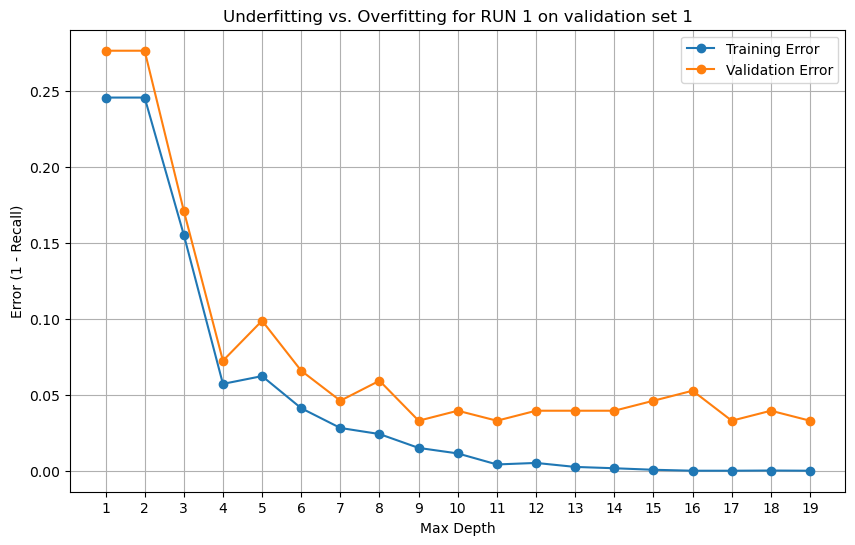

Resampled training set instances for iteration 1: 16000
Validation set 1 instances: 25934


Iteration 2: Target Fraud Count = 8500
SMOTE sampling_strategy (target_ratio): 0.0094
Resampled training set distribution:
is_fraud
0    8500
1    8500
Name: count, dtype: int64


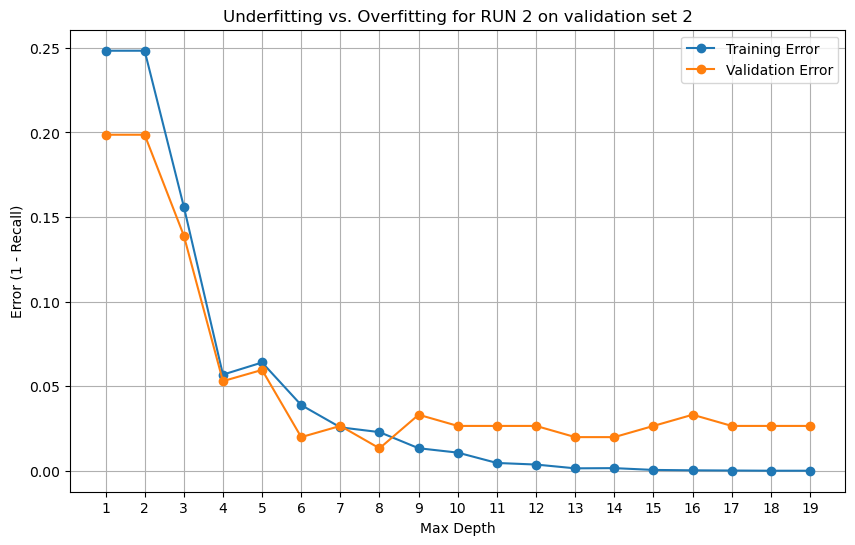

Resampled training set instances for iteration 2: 17000
Validation set 2 instances: 25934


Iteration 3: Target Fraud Count = 9000
SMOTE sampling_strategy (target_ratio): 0.0100
Resampled training set distribution:
is_fraud
0    9000
1    9000
Name: count, dtype: int64


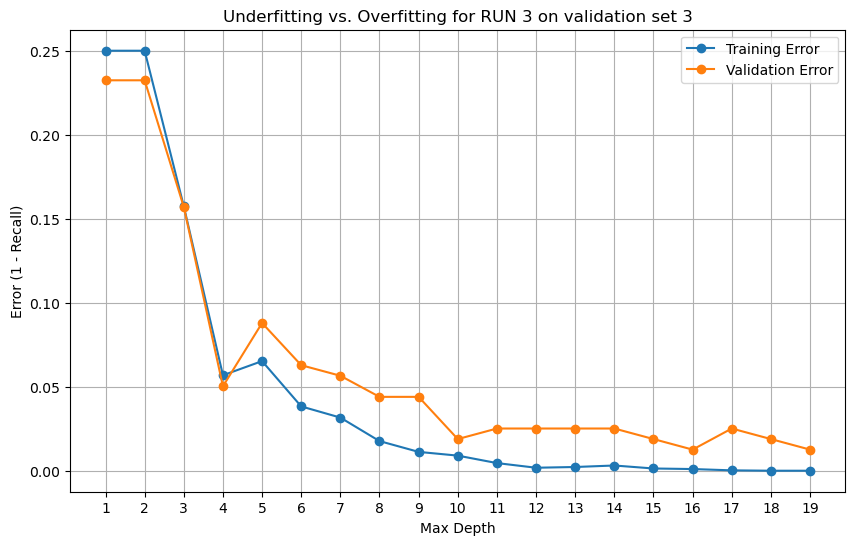

Resampled training set instances for iteration 3: 18000
Validation set 3 instances: 25934


Iteration 4: Target Fraud Count = 9500
SMOTE sampling_strategy (target_ratio): 0.0105
Resampled training set distribution:
is_fraud
0    9500
1    9500
Name: count, dtype: int64


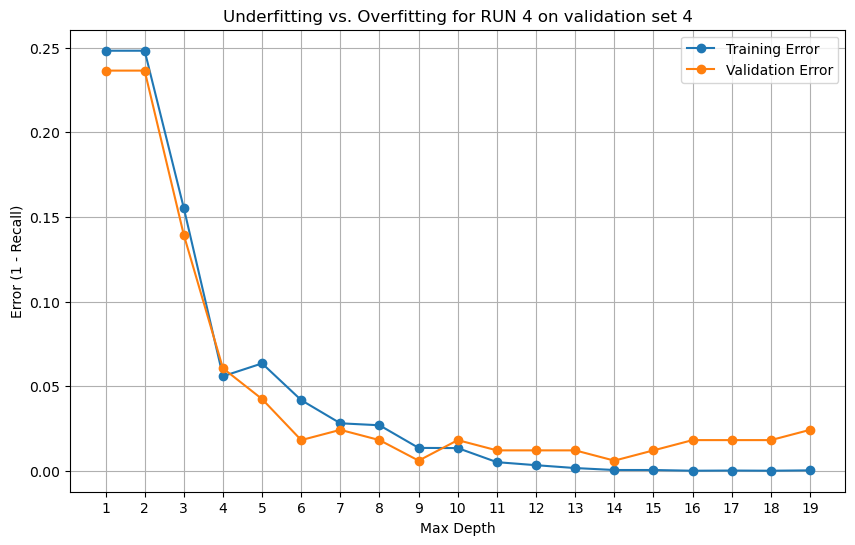

Resampled training set instances for iteration 4: 19000
Validation set 4 instances: 25934


Iteration 5: Target Fraud Count = 10000
SMOTE sampling_strategy (target_ratio): 0.0111
Resampled training set distribution:
is_fraud
0    10000
1    10000
Name: count, dtype: int64


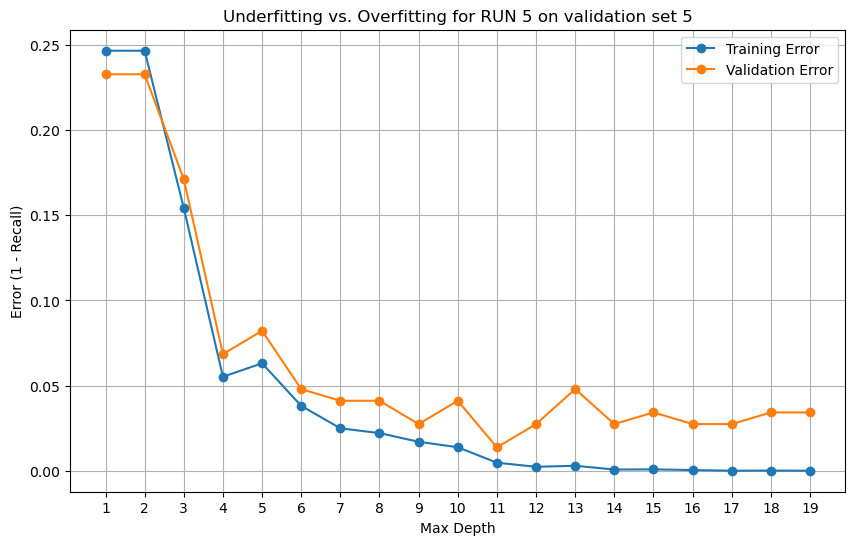

Resampled training set instances for iteration 5: 20000
Validation set 5 instances: 25934


Iteration 6: Target Fraud Count = 10500
SMOTE sampling_strategy (target_ratio): 0.0116
Resampled training set distribution:
is_fraud
0    10500
1    10500
Name: count, dtype: int64


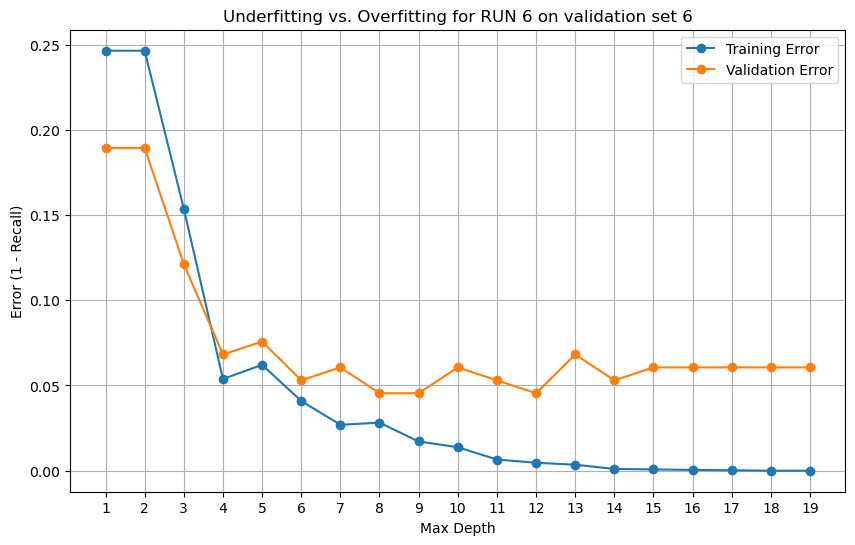

Resampled training set instances for iteration 6: 21000
Validation set 6 instances: 25934


Iteration 7: Target Fraud Count = 11000
SMOTE sampling_strategy (target_ratio): 0.0122
Resampled training set distribution:
is_fraud
0    11000
1    11000
Name: count, dtype: int64


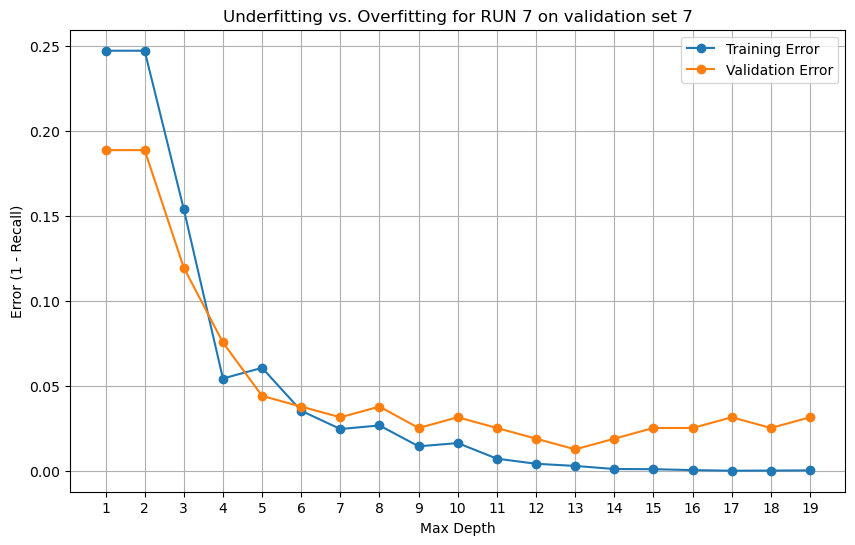

Resampled training set instances for iteration 7: 22000
Validation set 7 instances: 25934


Iteration 8: Target Fraud Count = 11500
SMOTE sampling_strategy (target_ratio): 0.0127
Resampled training set distribution:
is_fraud
0    11500
1    11500
Name: count, dtype: int64


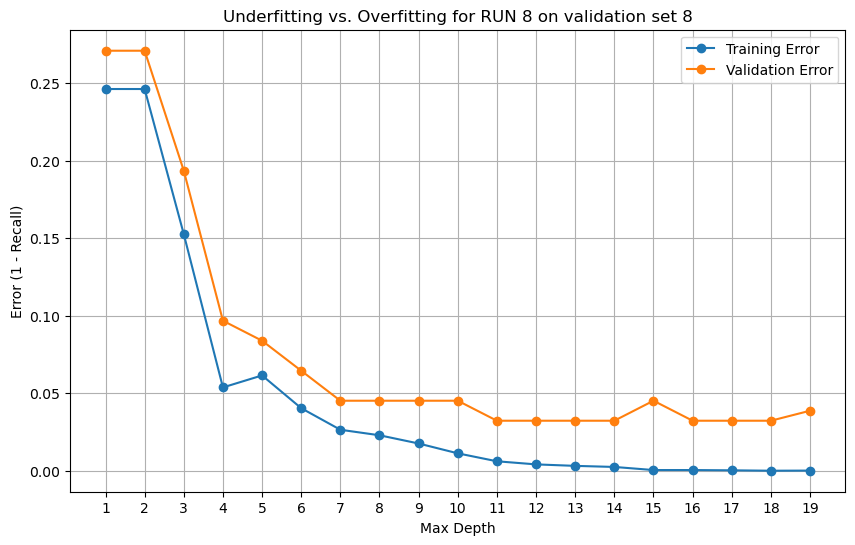

Resampled training set instances for iteration 8: 23000
Validation set 8 instances: 25934


Iteration 9: Target Fraud Count = 12000
SMOTE sampling_strategy (target_ratio): 0.0133
Resampled training set distribution:
is_fraud
0    12000
1    12000
Name: count, dtype: int64


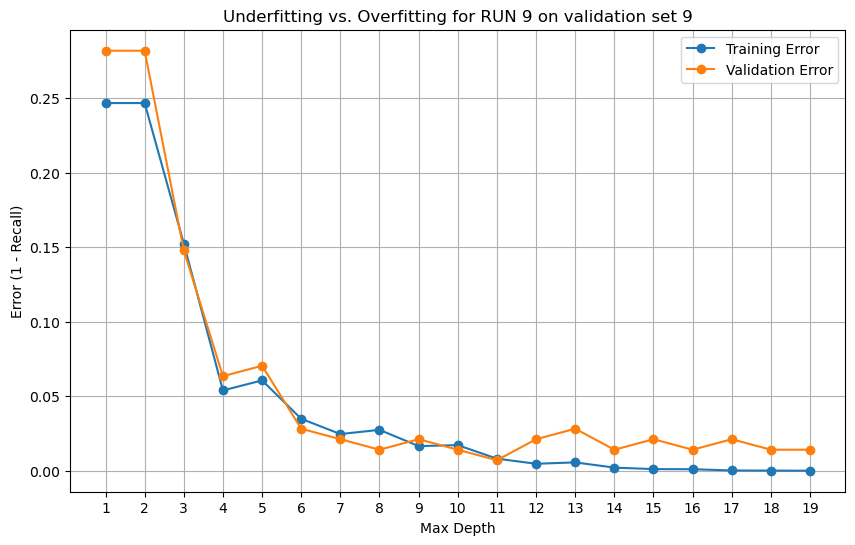

Resampled training set instances for iteration 9: 24000
Validation set 9 instances: 25933


Iteration 10: Target Fraud Count = 12500
SMOTE sampling_strategy (target_ratio): 0.0139
Resampled training set distribution:
is_fraud
0    12500
1    12500
Name: count, dtype: int64


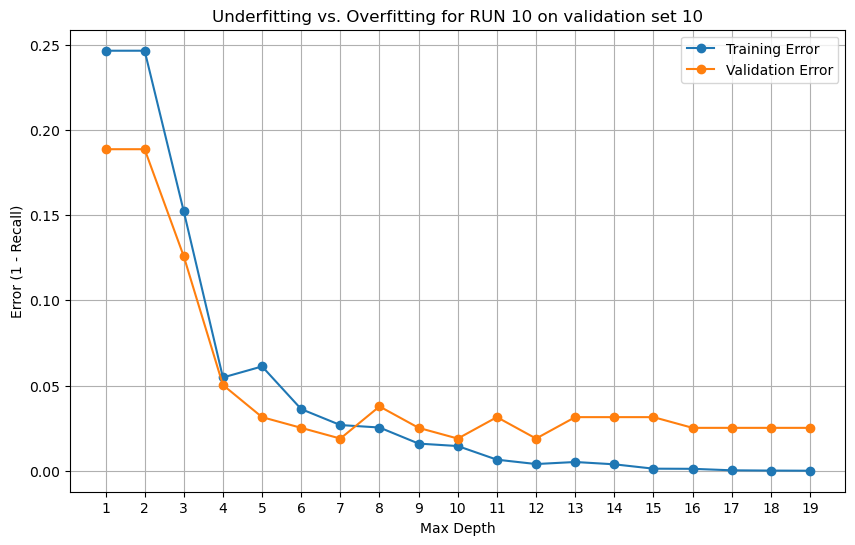

Resampled training set instances for iteration 10: 25000
Validation set 10 instances: 25933


Iteration 11: Target Fraud Count = 13000
SMOTE sampling_strategy (target_ratio): 0.0144
Resampled training set distribution:
is_fraud
0    13000
1    13000
Name: count, dtype: int64


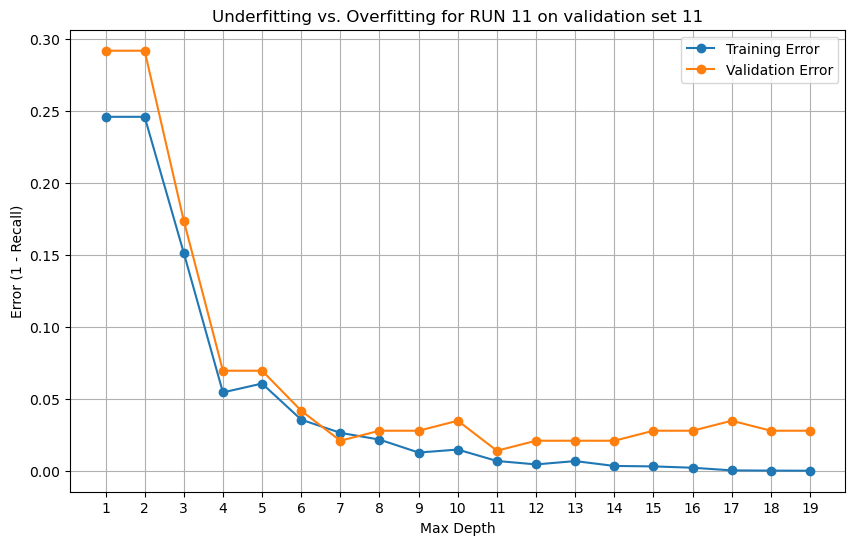

Resampled training set instances for iteration 11: 26000
Validation set 11 instances: 25933


Iteration 12: Target Fraud Count = 13500
SMOTE sampling_strategy (target_ratio): 0.0150
Resampled training set distribution:
is_fraud
0    13500
1    13500
Name: count, dtype: int64


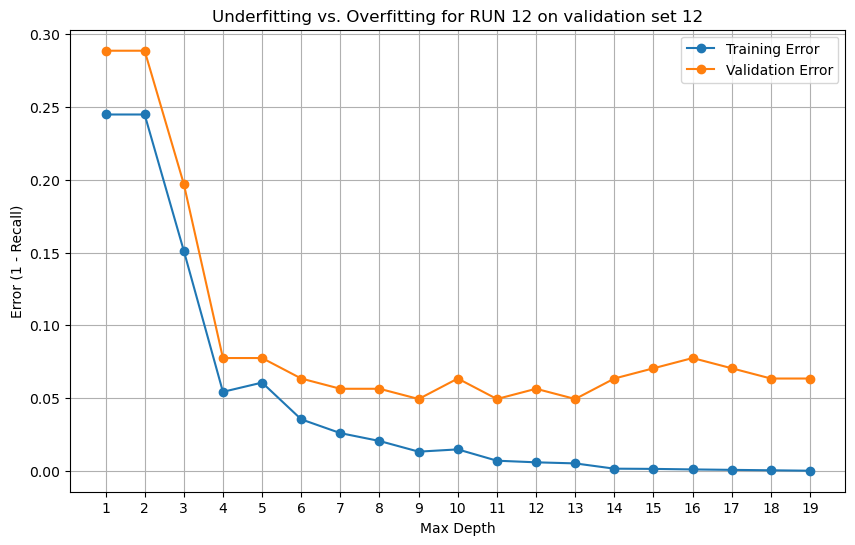

Resampled training set instances for iteration 12: 27000
Validation set 12 instances: 25933


Iteration 13: Target Fraud Count = 14000
SMOTE sampling_strategy (target_ratio): 0.0155
Resampled training set distribution:
is_fraud
0    14000
1    14000
Name: count, dtype: int64


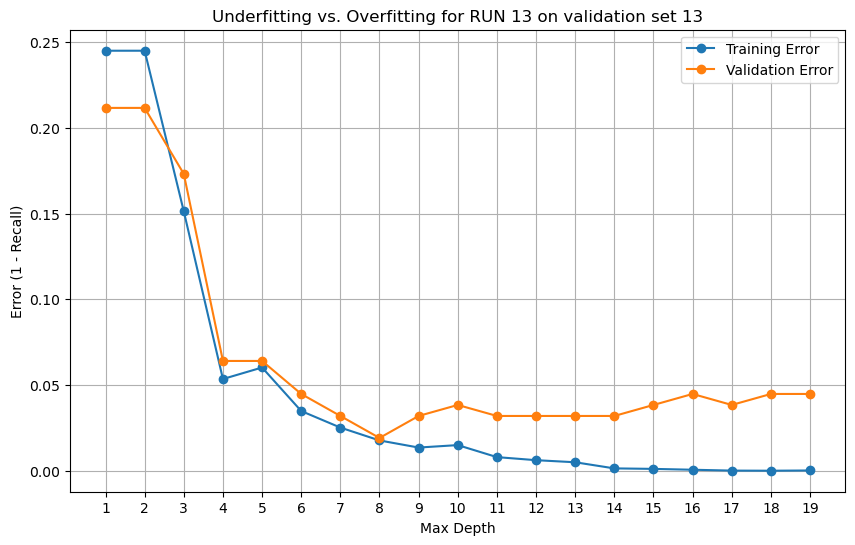

Resampled training set instances for iteration 13: 28000
Validation set 13 instances: 25933


Iteration 14: Target Fraud Count = 14500
SMOTE sampling_strategy (target_ratio): 0.0161
Resampled training set distribution:
is_fraud
0    14500
1    14500
Name: count, dtype: int64


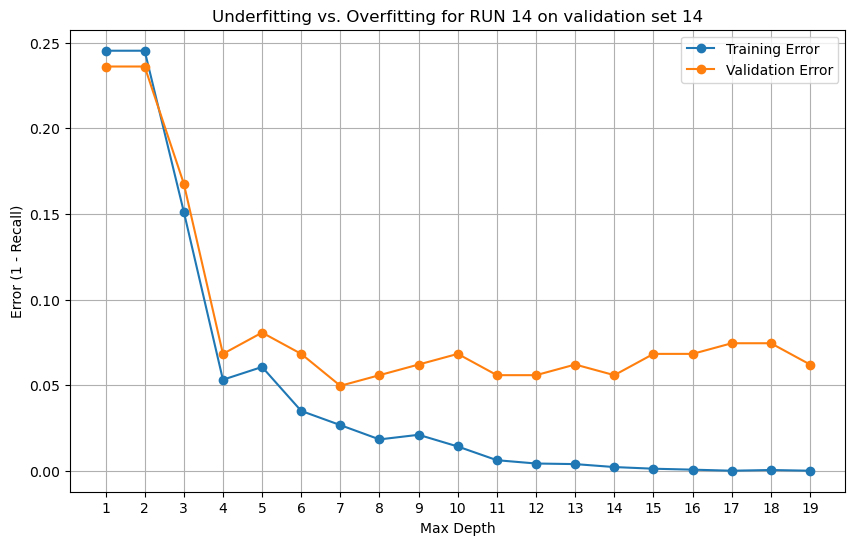

Resampled training set instances for iteration 14: 29000
Validation set 14 instances: 25933


Iteration 15: Target Fraud Count = 15000
SMOTE sampling_strategy (target_ratio): 0.0166
Resampled training set distribution:
is_fraud
0    14999
1    14999
Name: count, dtype: int64


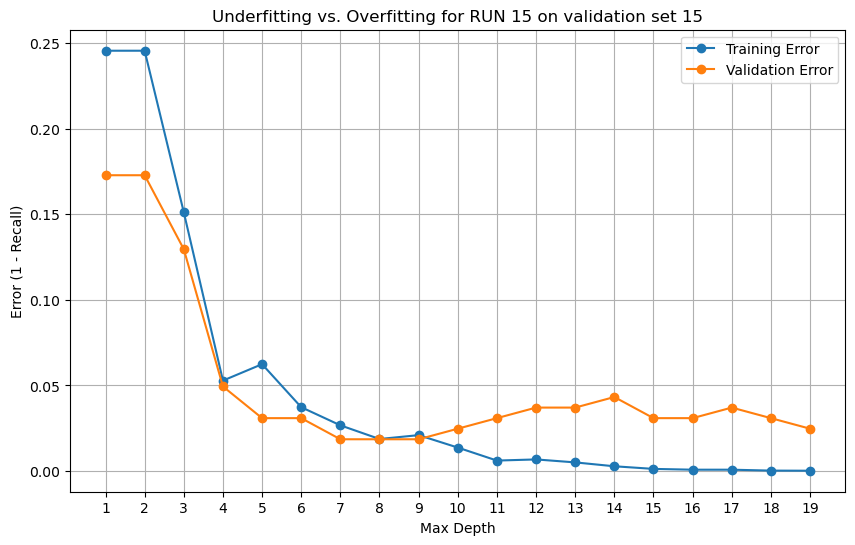

Resampled training set instances for iteration 15: 29998
Validation set 15 instances: 25933




In [34]:
X_train_res_dict = {}
y_train_res_dict = {}
X_val_dict = {}
y_val_dict = {}
y_train_pred_dict = {}  
y_val_pred_dict = {}    
train_recall_dict = {}  
val_recall_dict = {}    
train_errors_dict = {}
val_errors_dict = {}

# 15 validation sets
for i in range(1, 16):
    # step by 500
    target_fraud_count = 8000 + (i - 1) * 500
    print(f"Iteration {i}: Target Fraud Count = {target_fraud_count}")
    
    # SMOTE sampling strategy for the training
    majority_count = y_train_split.value_counts()[0]
    target_ratio = target_fraud_count / majority_count
    print(f"SMOTE sampling_strategy (target_ratio): {target_ratio:.4f}")
    
    # resampling pipeline: SMOTE oversampling followed by RandomUnderSampler
    over = SMOTE(sampling_strategy=target_ratio, random_state=42)
    under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
    resample_pipeline = Pipeline(steps=[('o', over), ('u', under)])
    
    # Apply pipeline to the training split
    X_train_res, y_train_res = resample_pipeline.fit_resample(X_train_split, y_train_split)
    X_train_res_dict[i] = X_train_res
    y_train_res_dict[i] = y_train_res
    
    print("Resampled training set distribution:")
    print(pd.Series(y_train_res).value_counts())
    
    current_validation = globals()[f"validation_set{i}"]
    X_val = current_validation.drop(columns=['is_fraud'])
    y_val = current_validation['is_fraud']
    X_val_dict[i] = X_val
    y_val_dict[i] = y_val
    
    train_errors_dict[i] = []
    val_errors_dict[i] = []
    y_train_pred_dict[i] = {}
    y_val_pred_dict[i] = {}
    train_recall_dict[i] = {}
    val_recall_dict[i] = {}
    
    for max_depth in range(1, 20):
        # Train Decision Tree model on resampled training data
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
        clf.fit(X_train_res, y_train_res)
        
        # Make predictions on training and validation data
        y_train_pred = clf.predict(X_train_res)
        y_val_pred = clf.predict(X_val)
        y_train_pred_dict[i][max_depth] = y_train_pred
        y_val_pred_dict[i][max_depth] = y_val_pred
        
        # Compute performance
        train_recall = recall_score(y_train_res, y_train_pred)
        val_recall = recall_score(y_val, y_val_pred)
        train_recall_dict[i][max_depth] = train_recall
        val_recall_dict[i][max_depth] = val_recall
        train_errors_dict[i].append(1 - train_recall)
        val_errors_dict[i].append(1 - val_recall)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 20), train_errors_dict[i], label="Training Error", marker='o')
    plt.plot(range(1, 20), val_errors_dict[i], label="Validation Error", marker='o')
    plt.title(f"Underfitting vs. Overfitting for RUN {i} on validation set {i}")
    plt.xlabel("Max Depth")
    plt.ylabel("Error (1 - Recall)")
    plt.xticks(range(1, 20))
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()
    
    # check n instances in resampled training and validation sets
    print(f"Resampled training set instances for iteration {i}: {X_train_res.shape[0]}")
    print(f"Validation set {i} instances: {X_val.shape[0]}")
    print("\n" + "="*60 + "\n")


# Choose the optimal max_depth of the classifier at different K values

### This is done by visual inspection: at a specficic depth, if we observe that errors (1-recall) on testing and validation sets are low, and there is no overfitting, then that depth is optimal for the specific hyperparameter K. 

In [35]:
# Setting the optimal depth for each validation set (visual inspection)
optimal_nodes_validation_set1=9
optimal_nodes_validation_set2=8
optimal_nodes_validation_set3=10
optimal_nodes_validation_set4=9
optimal_nodes_validation_set5=9
optimal_nodes_validation_set6=8
optimal_nodes_validation_set7=7
optimal_nodes_validation_set8=7
optimal_nodes_validation_set9=8
optimal_nodes_validation_set10=7
optimal_nodes_validation_set11=7
optimal_nodes_validation_set12=7
optimal_nodes_validation_set13=8
optimal_nodes_validation_set14=7
optimal_nodes_validation_set15=7

In [36]:
# Build a dictionary for the optimal tree depths
optimal_nodes = {
    1: optimal_nodes_validation_set1,
    2: optimal_nodes_validation_set2,
    3: optimal_nodes_validation_set3,
    4: optimal_nodes_validation_set4,
    5: optimal_nodes_validation_set5,
    6: optimal_nodes_validation_set6,
    7: optimal_nodes_validation_set7,
    8: optimal_nodes_validation_set8,
    9: optimal_nodes_validation_set9,
    10: optimal_nodes_validation_set10,
    11: optimal_nodes_validation_set11,
    12: optimal_nodes_validation_set12,
    13: optimal_nodes_validation_set13,
    14: optimal_nodes_validation_set14,
    15: optimal_nodes_validation_set15
}

clf_dict = {}
y_pred_val_dict = {}
accuracy_dict = {}
cm_dict = {}
total_instances_dict = {}
management_target_dict = {}
recall_dict = {}
y_pred_prob_val_dict = {}
fpr_dict = {}
tpr_dict = {}
thresholds_dict = {}
roc_auc_dict = {}

for i in range(1, 16):
    # Train a Decision Tree using the pre-defined optimal depth for the validation set
    clf_dict[i] = DecisionTreeClassifier(max_depth=optimal_nodes[i], random_state=0)
    clf_dict[i].fit(X_train_res_dict[i], y_train_res_dict[i])
    
    y_pred_val_dict[i] = clf_dict[i].predict(X_val_dict[i])
    accuracy_dict[i] = accuracy_score(y_val_dict[i], y_pred_val_dict[i]) * 100
    print(f"Accuracy for validation_set{i}: {accuracy_dict[i]:.2f}%\n")
    print("Classification Report:")
    print(classification_report(y_val_dict[i], y_pred_val_dict[i]))
    
    cm_dict[i] = confusion_matrix(y_val_dict[i], y_pred_val_dict[i])
    print("Confusion Matrix:")
    print(cm_dict[i])
    
    TN, FP, FN, TP = cm_dict[i].ravel()
    total_instances_dict[i] = TN + FP + FN + TP
    print(f"Total number of instances in validation_set{i}: {total_instances_dict[i]}")
    
    management_target_dict[i] = FP / FN if FN != 0 else float('inf')
    recall_dict[i] = TP / (TP + FN) if (TP + FN) != 0 else 0
    print(f"Management Target (FP:FN) for validation_set{i}: 1:{management_target_dict[i]:.2f}")
    print(f"Recall for validation_set{i}: {recall_dict[i]:.4f}\n")
    
    # predicted probabilities for the fraud class
    y_pred_prob_val_dict[i] = clf_dict[i].predict_proba(X_val_dict[i])[:, 1]
    
    fpr_dict[i], tpr_dict[i], thresholds_dict[i] = roc_curve(y_val_dict[i], y_pred_prob_val_dict[i])
    roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])
    print(f"The AUC for validation_set{i} is: {roc_auc_dict[i]:.4f}\n")
    print("=" * 50, "\n")


Accuracy for validation_set1: 96.77%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     25782
           1       0.15      0.97      0.26       152

    accuracy                           0.97     25934
   macro avg       0.57      0.97      0.62     25934
weighted avg       0.99      0.97      0.98     25934

Confusion Matrix:
[[24950   832]
 [    5   147]]
Total number of instances in validation_set1: 25934
Management Target (FP:FN) for validation_set1: 1:166.40
Recall for validation_set1: 0.9671

The AUC for validation_set1 is: 0.9855


Accuracy for validation_set2: 96.53%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     25783
           1       0.14      0.99      0.25       151

    accuracy                           0.97     25934
   macro avg       0.57      0.98      0.62     25934
weighted avg       0.99      0.97      0.98  

# Recap on VALIDATION SETS

In [37]:
for i in range(1, 16):
    k = 8000 + (i - 1) * 500
    total_instances = total_instances_dict[i]
    management_target = management_target_dict[i]
    recall_val = recall_dict[i]
    roc_auc = roc_auc_dict[i]
    tree_depth = optimal_nodes[i]

    print(f"VALIDATION SET {i}")
    print(f"K= {k}")
    print(f"Instances: {total_instances}")
    print(f"Target (FN:FP)= 1:{management_target:.2f}")
    print(f"Recall= {recall_val:.4f}")
    print(f"AUC= {roc_auc:.4f}")
    print(f"Tree Depth= {tree_depth}\n")


VALIDATION SET 1
K= 8000
Instances: 25934
Target (FN:FP)= 1:166.40
Recall= 0.9671
AUC= 0.9855
Tree Depth= 9

VALIDATION SET 2
K= 8500
Instances: 25934
Target (FN:FP)= 1:448.50
Recall= 0.9868
AUC= 0.9867
Tree Depth= 8

VALIDATION SET 3
K= 9000
Instances: 25934
Target (FN:FP)= 1:327.67
Recall= 0.9811
AUC= 0.9798
Tree Depth= 10

VALIDATION SET 4
K= 9500
Instances: 25934
Target (FN:FP)= 1:987.00
Recall= 0.9939
AUC= 0.9911
Tree Depth= 9

VALIDATION SET 5
K= 10000
Instances: 25934
Target (FN:FP)= 1:214.00
Recall= 0.9726
AUC= 0.9876
Tree Depth= 9

VALIDATION SET 6
K= 10500
Instances: 25934
Target (FN:FP)= 1:119.17
Recall= 0.9545
AUC= 0.9722
Tree Depth= 8

VALIDATION SET 7
K= 11000
Instances: 25934
Target (FN:FP)= 1:193.00
Recall= 0.9686
AUC= 0.9845
Tree Depth= 7

VALIDATION SET 8
K= 11500
Instances: 25934
Target (FN:FP)= 1:128.86
Recall= 0.9548
AUC= 0.9834
Tree Depth= 7

VALIDATION SET 9
K= 12000
Instances: 25933
Target (FN:FP)= 1:364.00
Recall= 0.9859
AUC= 0.9844
Tree Depth= 8

VALIDATION SE

# Final Run (train on FUll training set and test on TEST dataset)

Now we know that the optimal hyperparameter for SMOTE is k=9,500 and the number of nodes (features) to use is: 9

## Resampling Pipeline

In [38]:
# Print the original training set distribution:
print("Original training set distribution:")
print(y_train.value_counts())

# Define target number of fraud samples.
target_fraud_count = 9500

# Calculate the SMOTE sampling_strategy:
# desired minority count / current majority count.
# y_train.value_counts() returns counts with index 0 as majority (non-fraud) and 1 as fraud.
majority_count = y_train.value_counts()[0]  # non-fraud count: ~1,289,169
target_ratio = target_fraud_count / majority_count
print(f"SMOTE sampling_strategy (target_ratio): {target_ratio:.4f}")

# Create pipeline:
# Step 1: SMOTE oversamples the fraud class (label 1) so that its count becomes ~15,000 relative to the majority.
# Step 2: RandomUnderSampler downsamples the majority (non-fraud) to match the new fraud count.
over = SMOTE(sampling_strategy=target_ratio, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
resample_pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Apply the resampling pipeline to the training data
X_train_res, y_train_res = resample_pipeline.fit_resample(X_train, y_train)

# Check the new balanced training set distribution
print("Resampled training set distribution:")
print(pd.Series(y_train_res).value_counts())


Original training set distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64
SMOTE sampling_strategy (target_ratio): 0.0074
Resampled training set distribution:
is_fraud
0    9500
1    9500
Name: count, dtype: int64


## Descision Tree Classifier

### Train the Classifier and find the optimal depth of Tree

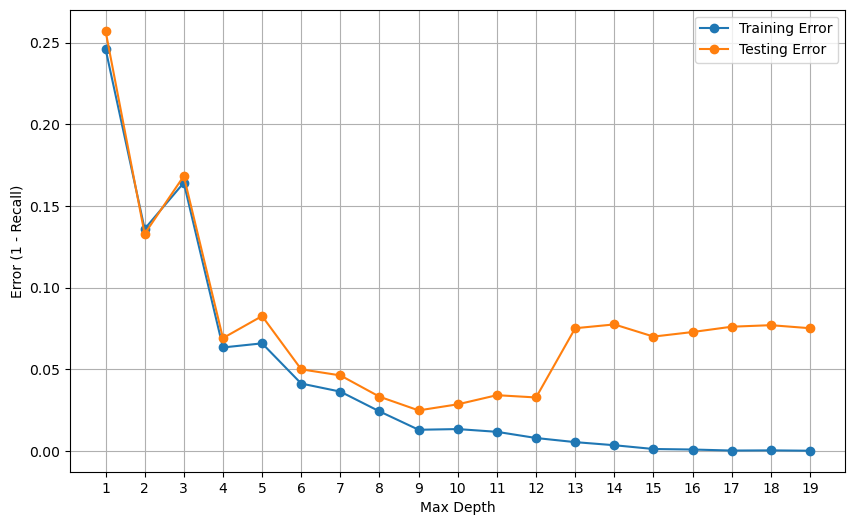

Training set instances: 1296675
Resampled training set instances: 19000
Test set instances: 555719


In [39]:
train_errors = []
test_errors = []

for max_depth in range(1, 20):
    # Initialize and train model with different max_depth in each iteration
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X_train_res, y_train_res)

    y_train_pred = clf.predict(X_train_res)
    y_test_pred = clf.predict(X_test)

    train_recall = recall_score(y_train_res, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_errors.append(1 - train_recall)
    test_errors.append(1 - test_recall)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_errors, label="Training Error", marker='o')
plt.plot(range(1, 20), test_errors, label="Testing Error", marker='o')

#plt.title("Model Performance: Underfitting vs. Overfitting")
plt.xlabel("Max Depth")
plt.ylabel("Error (1 - Recall)")
plt.xticks(range(1, 20))
plt.legend()
plt.grid()
#plt.savefig("GENERALIZATONgapTESTING.png", dpi=400, bbox_inches="tight")  
plt.show()

# check tot number of training instances
print("Training set instances:", X_train.shape[0])
print("Resampled training set instances:", X_train_res.shape[0])
print("Test set instances:", X_test.shape[0])


#### Fittings Analysis
- In depth range [1-5], Both training and testing errors are relatively high, showing underfitting
- In depth range [6-9], Both training and testing errors are relatively low and close to each other, showing good general
- In depth range [10-20], Training error continues to decrease and approach zero, but testing error begins to increase slightly, showing the model is too complex and Overfitts

#### At Depth 9, we can say that since the testing and training errors are low and balance, we can prove the hypothesis in validation set that tree depth = 9 as optimal max_depth of the classifier

In [40]:
# Train a Decision Tree model
clf = DecisionTreeClassifier(max_depth=9, random_state=0)
clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = clf.predict(X_test)

# Visualize the Decision Tree

### Decision Tree training dataset resampled

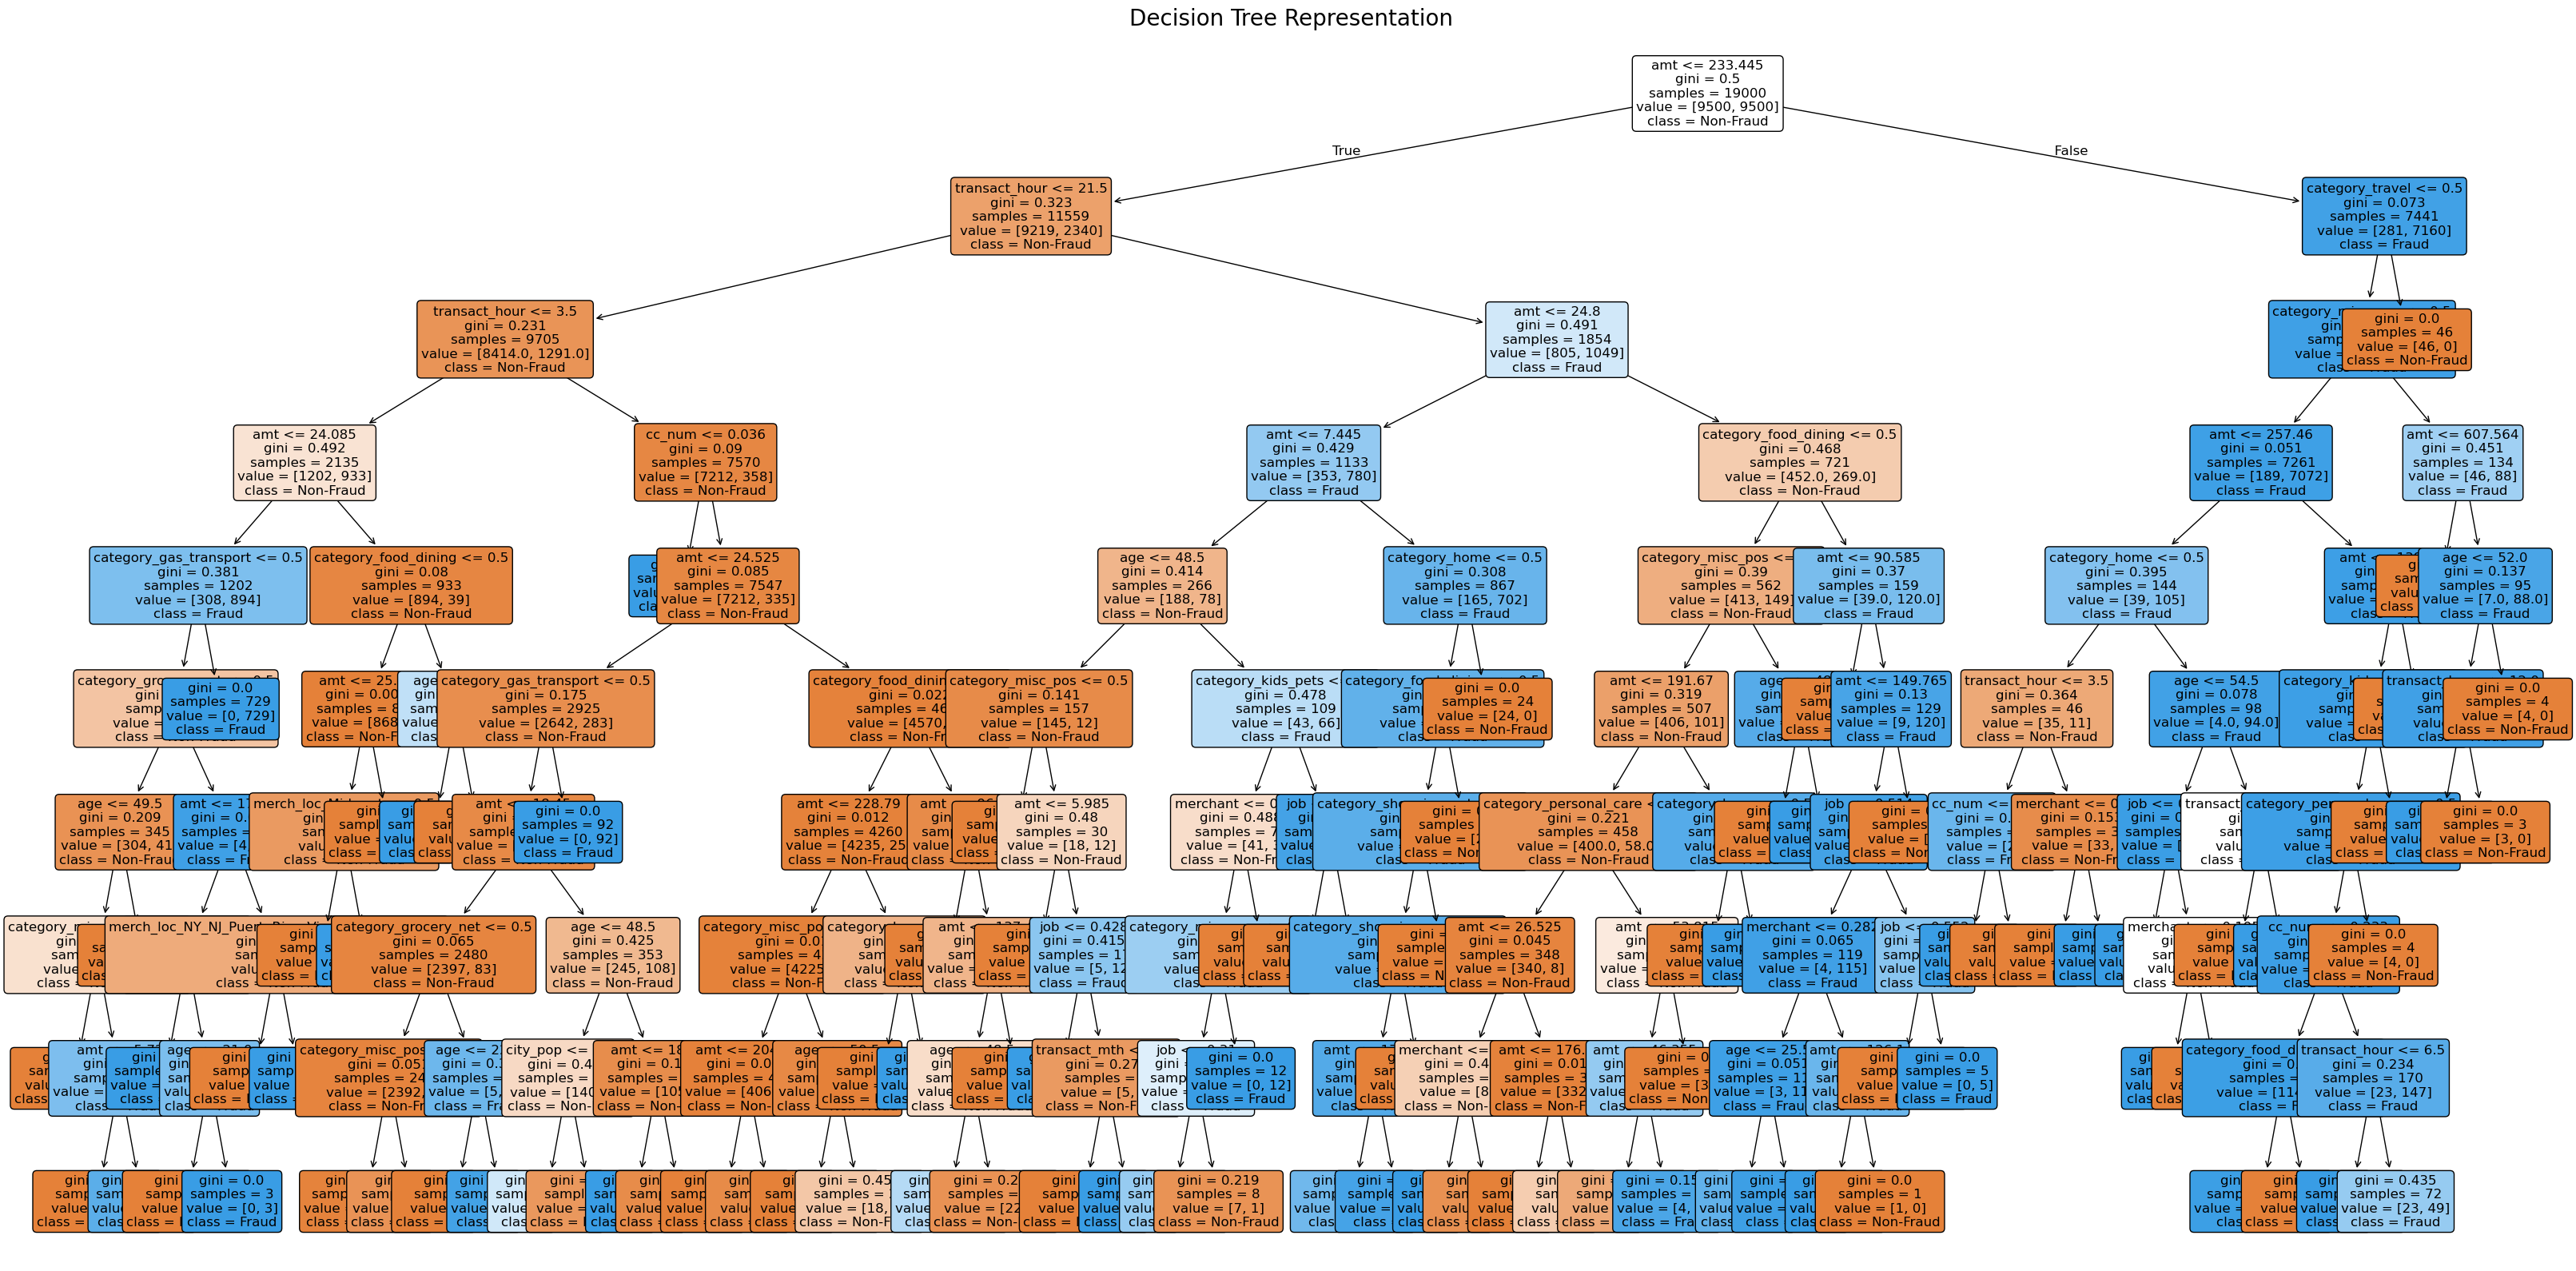

In [41]:
feature_list = ['cc_num', 'merchant', 'amt', 'gender', 'city_pop', 'job',
       'transact_hour', 'transact_mth', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'cust_loc_Midwest',
       'cust_loc_Mountain', 'cust_loc_NY_NJ_PuertoRico_VirginIslands',
       'cust_loc_NewEngland', 'cust_loc_Northwest_Alaska',
       'cust_loc_Outside US', 'cust_loc_Plains', 'cust_loc_SouthCentral',
       'cust_loc_Southeast', 'cust_loc_WestCoast_PacificIslands',
       'merch_loc_Midwest', 'merch_loc_Mountain',
       'merch_loc_NY_NJ_PuertoRico_VirginIslands', 'merch_loc_NewEngland',
       'merch_loc_Northwest_Alaska', 'merch_loc_Outside US',
       'merch_loc_Plains', 'merch_loc_SouthCentral', 'merch_loc_Southeast',
       'merch_loc_WestCoast_PacificIslands']


plt.figure(figsize=(40, 20)) 
plot_tree(
    clf,
    feature_names=feature_list,
    class_names=["Non-Fraud", "Fraud"], 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Representation", fontsize=20)
#plt.savefig("decision_tree.png", dpi=400, bbox_inches="tight")  
plt.show()


### Decision Tree test dataset with actual values of fraud

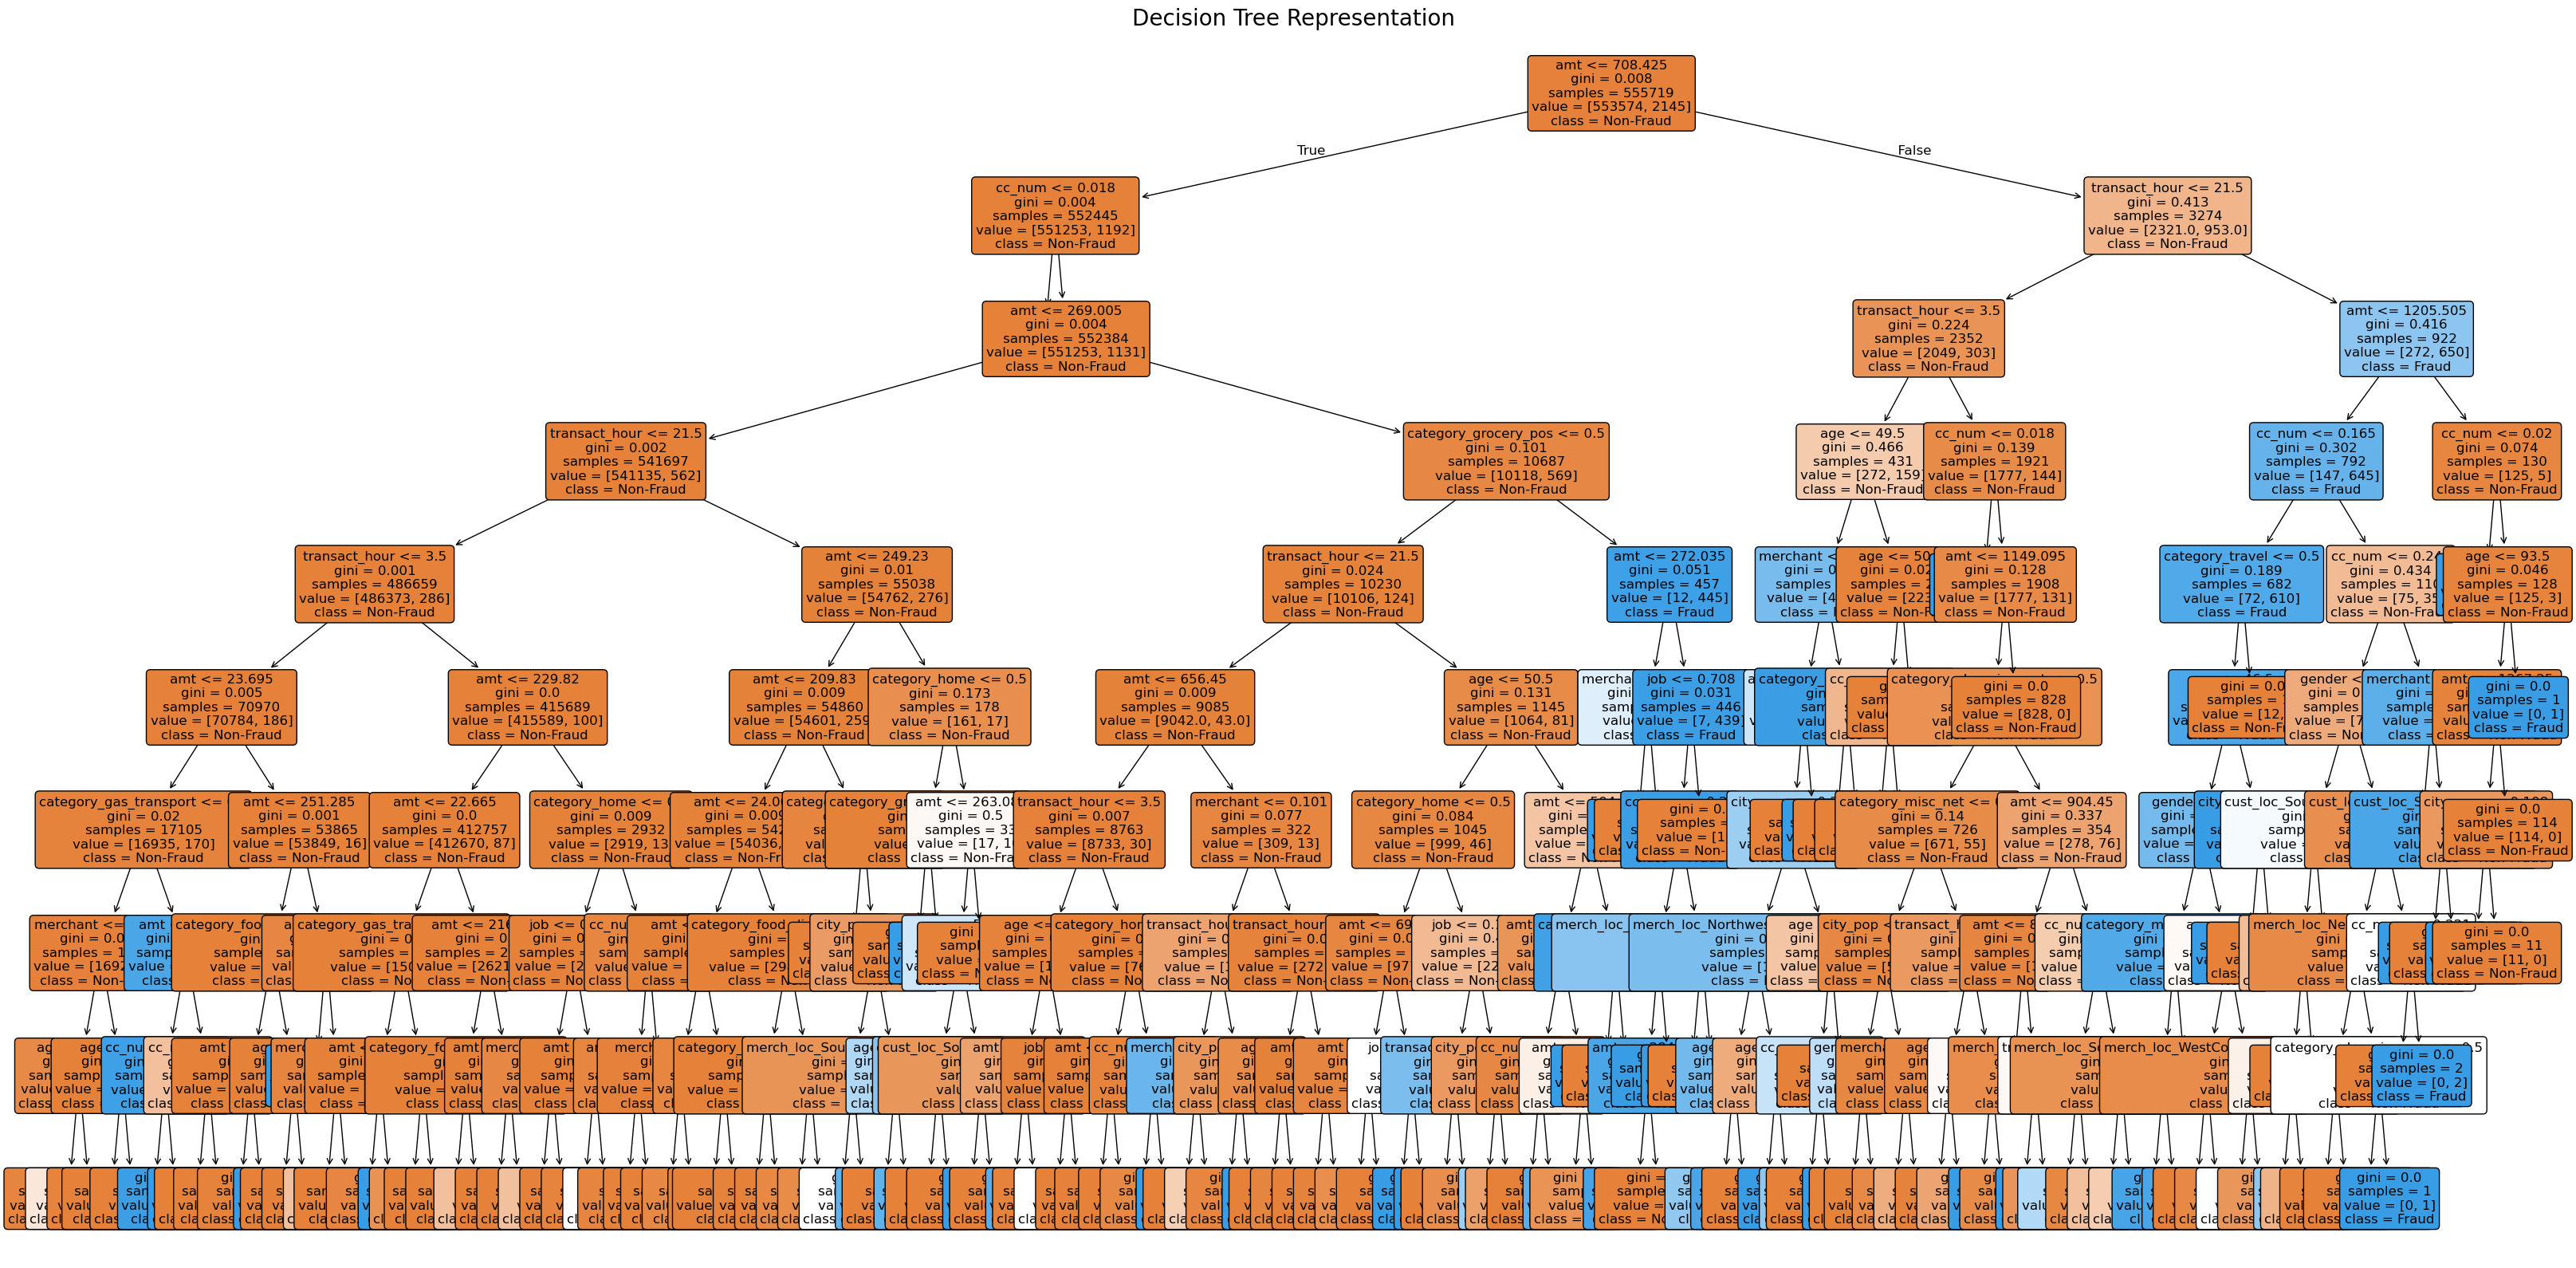

In [42]:
clf2 = DecisionTreeClassifier(max_depth=9, random_state=0)
clf2.fit(X_test, y_test)

plt.figure(figsize=(40, 20)) 
plot_tree(
    clf2,
    feature_names=feature_list,
    class_names=["Non-Fraud", "Fraud"], 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Representation", fontsize=20)
#plt.savefig("decision_tree.png", dpi=400, bbox_inches="tight")  
plt.show()


### Decision Tree test dataset with predicted values of fraud

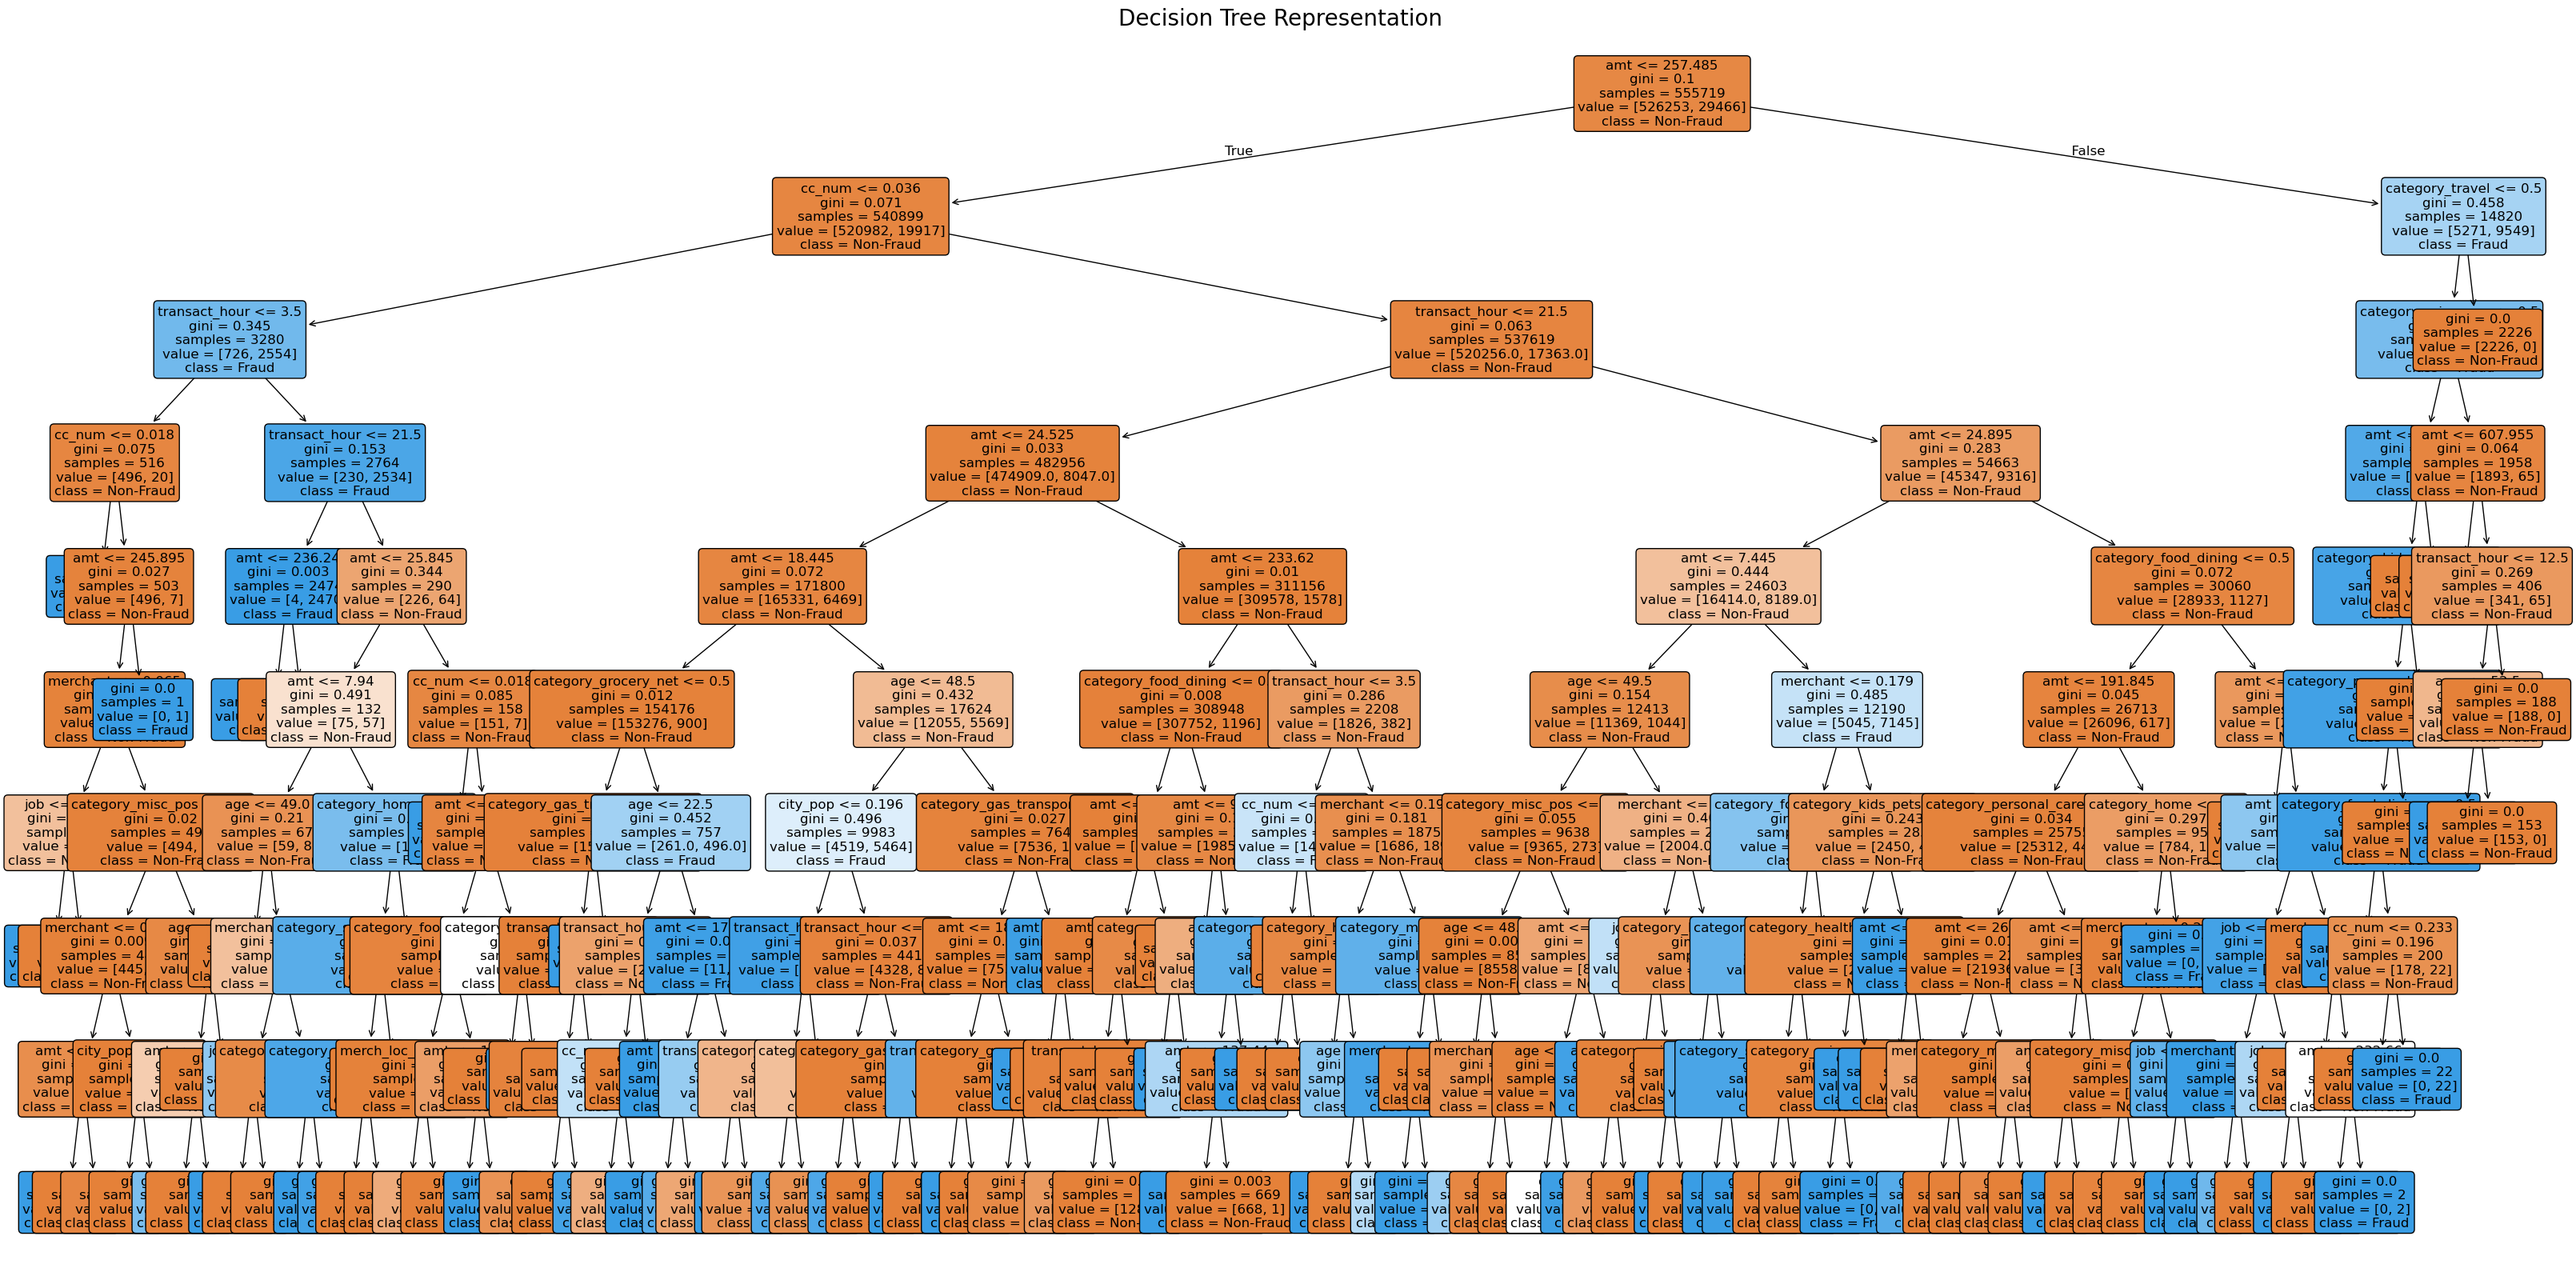

In [43]:
clf3 = DecisionTreeClassifier(max_depth=9, random_state=0)
clf3.fit(X_test, y_pred)

plt.figure(figsize=(40, 20)) 
plot_tree(
    clf3,
    feature_names=feature_list,
    class_names=["Non-Fraud", "Fraud"], 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Representation", fontsize=20)
#plt.savefig("decision_treeTesting.png", dpi=400, bbox_inches="tight")  
plt.show()


### Evaluate the Model

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy * 100
print(f"Accuracy: {accuracy:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm_test_set = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm_test_set.ravel()
print(f"\nTrue Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")
total_instances_test_set = TN + FP + FN + TP
print(f"\nTotal number of instances in validation_set1: {total_instances_test_set}")
management_target_test_set=FP/FN
recall_test_set=TP/(TP+FN)
print(f"\nThe management target is (False Negative:False Positive): 1:{management_target_test_set:.2f}")
print(f"\nThe recall is (TP/TP+FN):{recall_test_set:.4f}")


Accuracy: 95.06%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.07      0.98      0.13      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.96      0.55    555719
weighted avg       1.00      0.95      0.97    555719


Confusion Matrix:
[[526200  27374]
 [    53   2092]]

True Negatives: 526200
False Positives: 27374
False Negatives: 53
True Positives: 2092

Total number of instances in validation_set1: 555719

The management target is (False Negative:False Positive): 1:516.49

The recall is (TP/TP+FN):0.9753


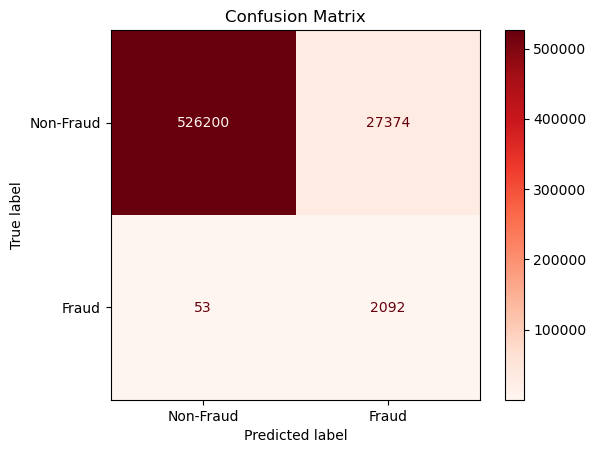

In [45]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Reds)

plt.title('Confusion Matrix')
plt.show()


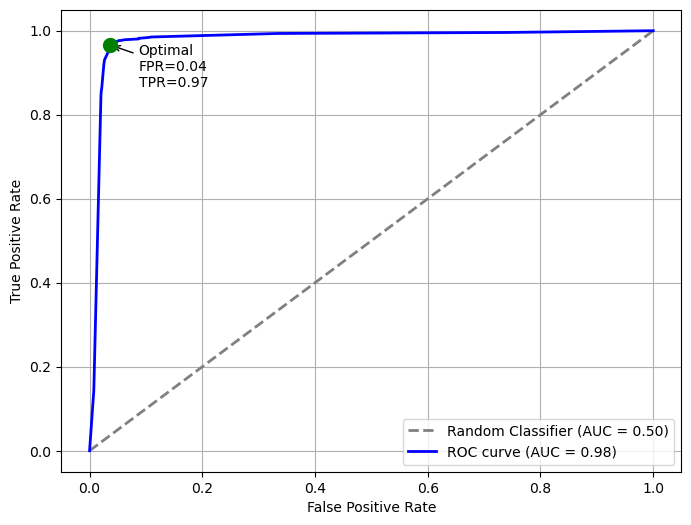

The AUC for the test set is: 0.9787


In [46]:
# Compute ROC curve and AUC
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# random classifier baseline
random_fpr = np.linspace(0, 1, 100)
random_tpr = random_fpr  # The random classifier follows the diagonal line
plt.figure(figsize=(8, 6))
plt.plot(random_fpr, random_tpr, color='gray', linestyle='--', lw=2, label='Random Classifier (AUC = 0.50)')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
differences = np.abs(tpr - (1 - fpr))
optimal_idx = np.argmin(differences)
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

plt.scatter(optimal_fpr, optimal_tpr, color='green', s=100, zorder=5)
plt.annotate(f"Optimal\nFPR={optimal_fpr:.2f}\nTPR={optimal_tpr:.2f}",
             xy=(optimal_fpr, optimal_tpr),
             xytext=(optimal_fpr + 0.05, optimal_tpr - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
#plt.savefig("ROCdecision_tree.png", dpi=400, bbox_inches="tight")  
plt.show()

# AUC for test set
print(f"The AUC for the test set is: {roc_auc:.4f}")

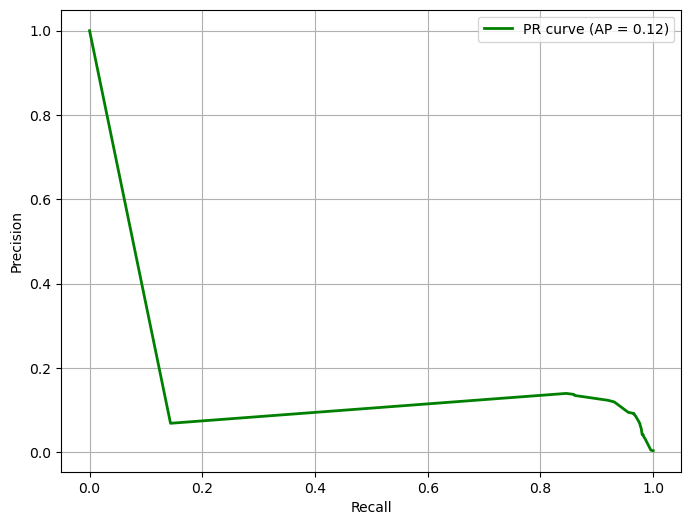

In [47]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
#plt.savefig("PRdecision_tree.png", dpi=400, bbox_inches="tight")  
plt.show()


## Explanation coverage curve

As we lower the decision threshold, we add more samples as positive. Some of these will be true positives and others false positives. 
The cumulative sum gives us exactly those counts.



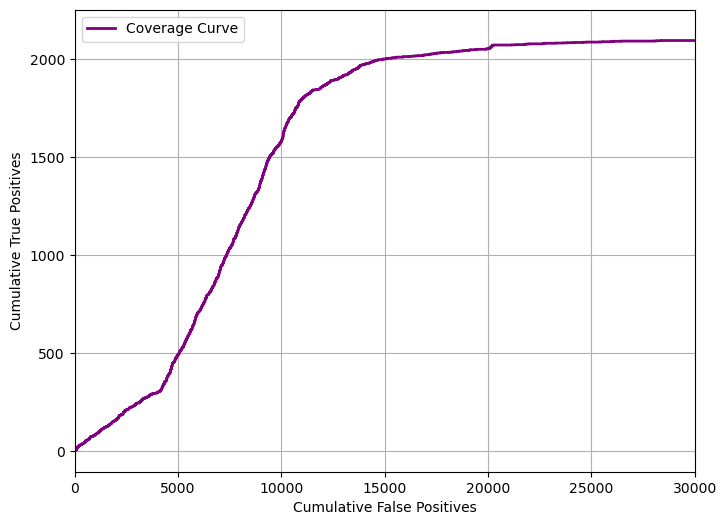

In [48]:
sorted_indices = np.argsort(y_pred_prob)[::-1]
sorted_y_test = y_test.iloc[sorted_indices].values
# -True Positives (TP): When sorted_y_test equals 1.
# -False Positives (FP): When sorted_y_test equals 0.
cum_true_positives = np.cumsum(sorted_y_test == 1)
cum_false_positives = np.cumsum(sorted_y_test == 0)
# - x: Cumulative false positives (predicted positive but actually negative)
# - y: Cumulative true positives (predicted positive and actually positive)
plt.figure(figsize=(8, 6))
plt.plot(cum_false_positives, cum_true_positives, marker='', linestyle='-', lw=2, color='purple', label='Coverage Curve')
plt.xlabel('Cumulative False Positives')
plt.ylabel('Cumulative True Positives')
#plt.title('Coverage Curve: True Positives vs. False Positives')
plt.xlim(0, 30000)  # Scale false positive axis to 30,000 (adjust as needed)
plt.grid(True)
plt.legend()
#plt.savefig("COVERAGEdecision_tree.png", dpi=400, bbox_inches="tight")  
plt.show()

## Results Analysis

The graph shows how, as we lower the threshold (include more samples as positive), both the number of true positives and false positives increase. It allows to understand the trade-off between capturing more true positives and having more false positives.
If we have class imbalance, as is the case, and we increased the number of actual negative frauds, the change ratio would not appear in the ROC curve, but it would appear and become clear in this coverage graph. Then, the performance of the model could be better explained with F1, recall and precision, with higher priority to recall and number of false negative on the number of false positive.


## Results Analysis

In [49]:
print(f"Test set")
print(f"K= 9,500")
print(f"Instances:{total_instances_test_set}")
print(f"Target (FN:FP)= 1:{management_target_test_set:.2f}")
print(f"Recall={recall_test_set:.4f}")
print(f"AUC= {roc_auc:.4f}")
print(f"Tree Depth=9")

Test set
K= 9,500
Instances:555719
Target (FN:FP)= 1:516.49
Recall=0.9753
AUC= 0.9787
Tree Depth=9


## Feature Analysis

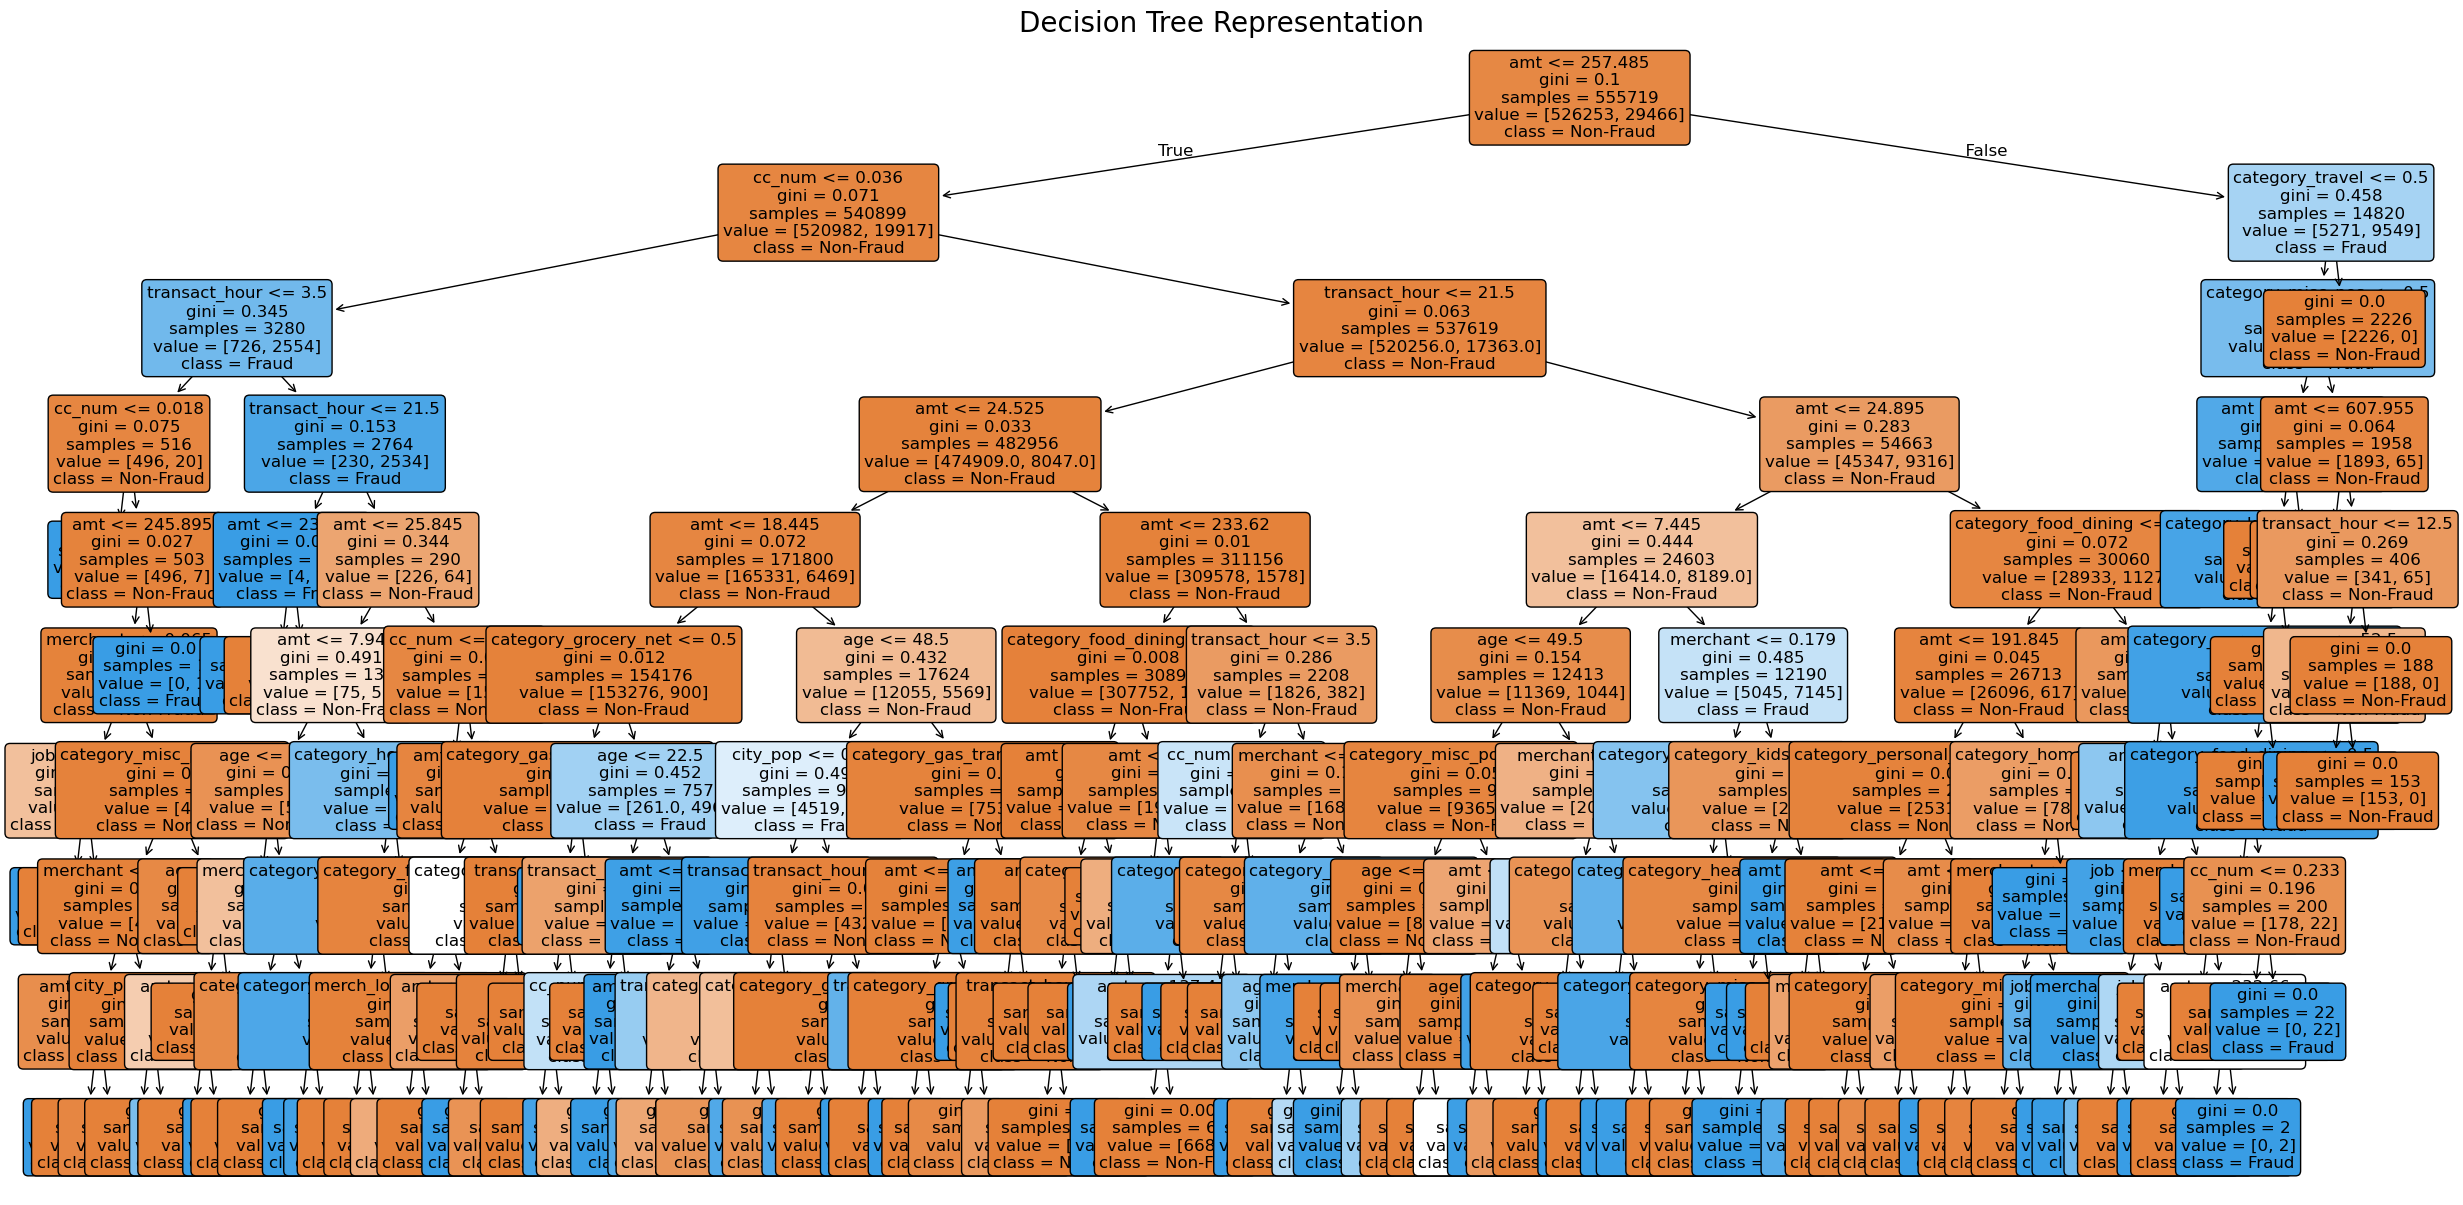

In [50]:
clf3 = DecisionTreeClassifier(max_depth=9, random_state=0)
clf3.fit(X_test, y_pred)

plt.figure(figsize=(30, 15)) 
plot_tree(
    clf3,
    feature_names=feature_list,
    class_names=["Non-Fraud", "Fraud"], 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Representation", fontsize=20)
#plt.savefig("decision_treeTesting.png", dpi=400, bbox_inches="tight")  
plt.show()


In [51]:
def featureOrder(model, df): 
    return pd.DataFrame({'cols': df.columns, 'imp': model.feature_importances_ }).round(2).sort_values('imp', ascending=False)

feature_importance = featureOrder(clf3, X_test)
feature_importance[:10]


cols   imp
2                     amt  0.43
4                city_pop  0.08
0                  cc_num  0.07
8                     age  0.07
6           transact_hour  0.07
17      category_misc_pos  0.05
1                merchant  0.04
9    category_food_dining  0.04
21        category_travel  0.04
19  category_shopping_net  0.02

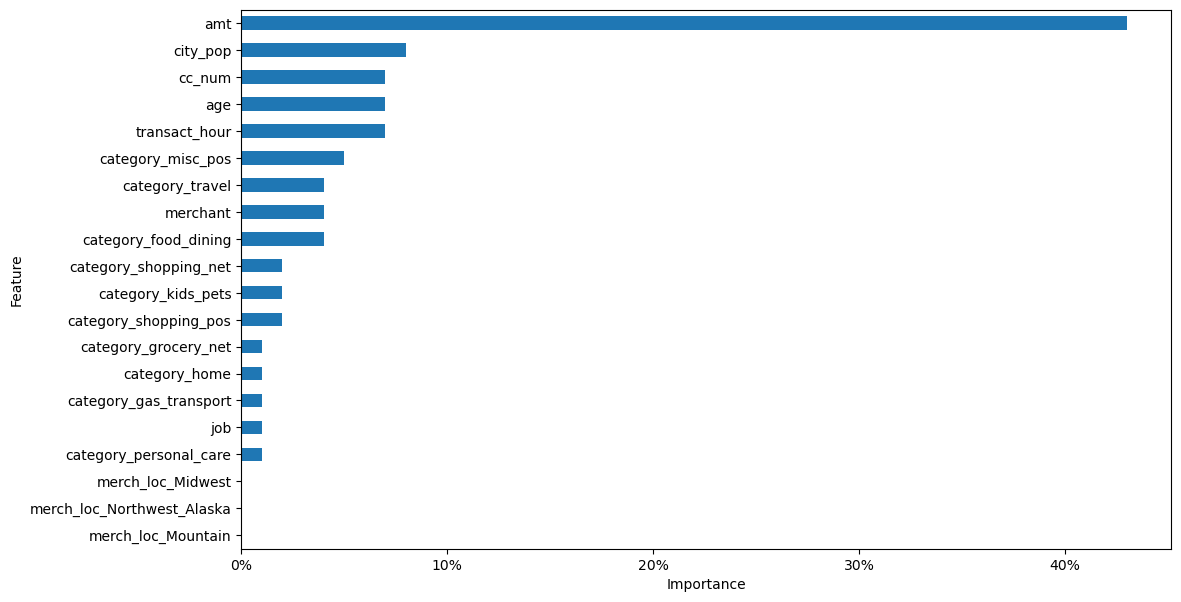

In [52]:
def plot_feat_imp(feat_importance):
    feat_importance = feat_importance.copy()  # Avoid modifying the original DataFrame
    feat_importance['imp'] *= 100  # Convert importance to percentage

    ax = feat_importance.sort_values(by='imp', ascending=True).plot(
        'cols', 'imp', 'barh', figsize=(12, 7), legend=False
    )

    ax.set_xlabel("Importance")  # Update x-axis label to reflect percentage
    ax.set_ylabel("Feature")
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))  # Format x-axis ticks as percentages

    return ax

plot_feat_imp(feature_importance[:20])
#plt.savefig("featureImportance.png", dpi=400, bbox_inches="tight")
plt.show()